# Proiect Big Data

# 1. Introducere

Pentru mai multe multe detalii cu privire la setul de date ales de mine, puteti gasi toate detaliile tehnice necesare in sectiunea 1 a documentului 405_Procopie_Gabriel-Proiect_BigData.pdf .

# 2. Procesarea datelor 

## Install Library

In [1]:
!pip install pyspark
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 52 kB/s 
     |████████████████████████████████| 199 kB 64.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=5be870ee146d049f10b9327bee39078217d06a7f1396d0a79fe538964be0b4ff
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simp

## Loading Library

In [2]:
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import stddev,countDistinct,count,avg,col
from pyspark.sql.functions import when
from pyspark.sql.functions import mean

from pyspark.sql.types import IntegerType
from sklearn.impute import SimpleImputer

### Spark Session

In [3]:
spark = SparkSession.builder.master("local[4]").getOrCreate()

### Saving Data as PySpark DataFrame

In [4]:
data_as_spark = spark.read.csv('original_data_null.csv',header=True)
data_as_spark_1 = spark.read.csv('original_data_.csv',header=True)

## Data analysis

### Data Columns

In [5]:
data_as_spark.columns

['group',
 'ID',
 'outcome',
 'age',
 'gender',
 'BMI',
 'hypertensive',
 'atrialfibrillation',
 'CHD_with_no_MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renull_failure',
 'COPD',
 'heart_rate',
 'Systolic_blood_pressure',
 'Diastolic_blood_pressure',
 'Respiratory_rate',
 'temperature',
 'SPO2',
 'Urine_output',
 'hematocrit',
 'RBC',
 'MCH',
 'MCHC',
 'MCV',
 'RDW',
 'Leucocyte',
 'Platelets',
 'Neutrophils',
 'Basophils',
 'Lymphocyte',
 'PT',
 'INR',
 'NT-proBNP',
 'Creatine_kise',
 'Creatinine',
 'Urea_nitrogen',
 'glucose',
 'Blood_potassium',
 'Blood_sodium',
 'Blood_calcium',
 'Chloride',
 'Anion_gap',
 'Magnesium_ion',
 'PH',
 'Bicarbote',
 'Lactic_acid',
 'PCO2',
 'EF']

### Data scheme

In [6]:
data_as_spark.printSchema()

root
 |-- group: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- outcome: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- hypertensive: string (nullable = true)
 |-- atrialfibrillation: string (nullable = true)
 |-- CHD_with_no_MI: string (nullable = true)
 |-- diabetes: string (nullable = true)
 |-- deficiencyanemias: string (nullable = true)
 |-- depression: string (nullable = true)
 |-- Hyperlipemia: string (nullable = true)
 |-- Renull_failure: string (nullable = true)
 |-- COPD: string (nullable = true)
 |-- heart_rate: string (nullable = true)
 |-- Systolic_blood_pressure: string (nullable = true)
 |-- Diastolic_blood_pressure: string (nullable = true)
 |-- Respiratory_rate: string (nullable = true)
 |-- temperature: string (nullable = true)
 |-- SPO2: string (nullable = true)
 |-- Urine_output: string (nullable = true)
 |-- hematocrit: string (nullable = true)
 |-- RBC: stri

### Data Visualization

In [7]:
data_as_spark.createOrReplaceTempView("results")
sql_results_data_as_spark = spark.sql("select age Varsta,gender Sex,heart_rate Ritm_cardiac,depression Depresie,temperature Temperatura,Respiratory_rate Frecventa_respiratorie,Blood_calcium Calciu,Blood_potassium Potasiu,Blood_sodium Sodiu  from results")
sql_results_data_as_spark.show()

+------+---+------------+--------+-----------+----------------------+-----------+-----------+-----------+
|Varsta|Sex|Ritm_cardiac|Depresie|Temperatura|Frecventa_respiratorie|     Calciu|    Potasiu|      Sodiu|
+------+---+------------+--------+-----------+----------------------+-----------+-----------+-----------+
|    72|  1| 68.83783784|       0|36.71428571|           16.62162162|7.463636364|4.816666667|     138.75|
|    75|  2| 101.3703704|       0|36.68253968|           20.85185185|     8.1625|       4.45|138.8888889|
|    83|  2| 72.31818182|       0| 36.4537037|                 23.64|8.266666667|      5.825|140.7142857|
|    43|  2|        94.5|       0|36.28703704|           21.85714286|9.476923077|4.386666667|      138.5|
|    75|  2|       67.92|       0|36.76190476|                 21.36|8.733333333|4.783333333|136.6666667|
|    76|  1| 74.18181818|       0|35.26666667|           20.54545455|8.466666667|      4.075|     136.25|
|    72|  1| 69.63636364|       0| 35.6031746|

### Data Summary

In [8]:
sql_describe_data_as_spark = spark.sql("select age Varsta,gender Sex,heart_rate Ritm_cardiac,temperature Temperatura,Blood_calcium Calciu,Blood_potassium Potasiu from results")
sql_describe_data_as_spark.summary().show()

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+
|summary|            Varsta|                Sex|      Ritm_cardiac|       Temperatura|            Calciu|            Potasiu|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+
|  count|              1177|               1177|              1177|              1177|              1177|               1177|
|   mean| 74.05522514868309| 1.5250637213254035| 84.57584840750846| 36.67728595220208| 8.500894160843536|  4.176646395857267|
| stddev|13.434060756372105|0.49958368741589076|16.018701499654277|0.6075583791550683|0.5722625957038024|0.41483603133775254|
|    min|                19|                  1|       100.0357143|             33.25|       10.00769231|                  3|
|    25%|              65.0|                1.0|             72.36|       36.28571429|       8.145454545|             

### Visualization of age range

In [9]:
data_as_spark.createOrReplaceTempView("pacients")
sql_age_range_data_as_spark = spark.sql("select min(age) Varsta_minima , max(age) Varsta_maxima from pacients")
sql_age_range_data_as_spark.show()

+-------------+-------------+
|Varsta_minima|Varsta_maxima|
+-------------+-------------+
|           19|           99|
+-------------+-------------+



### Age distribution

In [10]:
data_as_spark.createOrReplaceTempView("age_distrib")
sql_age_data_as_spark = spark.sql("SELECT `19-40`,`41-60`,`61-80`,`81-99` FROM ( select count(ID) `19-40` from age_distrib where age>=19 AND age<=40) JOIN (select count(ID) `41-60` from age_distrib where age>=41 AND age<=60) JOIN (select count(ID) `61-80` from age_distrib where age>=61 AND age<=80) JOIN (select count(ID) `81-99` from age_distrib where age>=81 AND age<=99)")
sql_age_data_as_spark.show()

+-----+-----+-----+-----+
|19-40|41-60|61-80|81-99|
+-----+-----+-----+-----+
|   20|  171|  517|  469|
+-----+-----+-----+-----+



### Gender distribution

In [11]:
data_as_spark.createOrReplaceTempView("age_distrib")
sql_gender_data_as_spark = spark.sql("SELECT `No. Women`,`No. Men` FROM ( select count(ID) `No. Women` from age_distrib where gender==1) JOIN (select count(ID) `No. Men` from age_distrib where gender==2)")
sql_gender_data_as_spark.show()

+---------+-------+
|No. Women|No. Men|
+---------+-------+
|      559|    618|
+---------+-------+



### Survivors distribution

In [12]:
sql_survivors_data_as_spark = spark.sql("SELECT `Survivors`,`Others` FROM ( select count(ID) `Survivors` from age_distrib where outcome==0) JOIN (select count(ID) `Others` from age_distrib where outcome==1)")
sql_survivors_data_as_spark.show()

+---------+------+
|Survivors|Others|
+---------+------+
|     1017|   158|
+---------+------+



## Data processing

### Columns  processing

Un prim pas pe care il consider important este redenumirea coloanelor setului de date. Unele dintre acestea contin anumite denumiri care nu sunt tocmai cunoscute. Pentru a observa care dintre coloane sunt importante, voi redenumi fiecare coloana cu o denumire mai sugestiva. Pentru a vizualiza denumirile initiale ale coloanelor, puteti observa rezultatul celulei [5].

In [13]:
data_as_spark=data_as_spark.withColumnRenamed('group','Grup')
data_as_spark=data_as_spark.withColumnRenamed('ID','Numar')
data_as_spark=data_as_spark.withColumnRenamed('outcome','Stare')
data_as_spark=data_as_spark.withColumnRenamed('age','Varsta')
data_as_spark=data_as_spark.withColumnRenamed('gender','Sex')
data_as_spark=data_as_spark.withColumnRenamed('BMI','Indice_de_masa_corporala')
data_as_spark=data_as_spark.withColumnRenamed('hypertensive','Hipertensiv')
data_as_spark=data_as_spark.withColumnRenamed('atrialfibrillation','Fibrilatie_atriala')
data_as_spark=data_as_spark.withColumnRenamed('CHD_with_no_MI','Boala_coronariana')
data_as_spark=data_as_spark.withColumnRenamed('diabetes','Diabet')
data_as_spark=data_as_spark.withColumnRenamed('deficiencyanemias','Anemii_deficitare')
data_as_spark=data_as_spark.withColumnRenamed('depression','Depresie')
data_as_spark=data_as_spark.withColumnRenamed('Hyperlipemia','Hiperlipemie')
data_as_spark=data_as_spark.withColumnRenamed('Renull_failure','Insuficienta_renala')
data_as_spark=data_as_spark.withColumnRenamed('COPD','Boala_pulmonara_obstructiva_cronica')
data_as_spark=data_as_spark.withColumnRenamed('heart_rate','Frecventa_cardiaca')
data_as_spark=data_as_spark.withColumnRenamed('Systolic_blood_pressure','Tensiune_arteriala_sistolica')
data_as_spark=data_as_spark.withColumnRenamed('Diastolic_blood_pressure','Tensiune_arteriala_diastolica')
data_as_spark=data_as_spark.withColumnRenamed('Respiratory_rate','Frecventa_respiratorie')
data_as_spark=data_as_spark.withColumnRenamed('temperature','Temperatura')
data_as_spark=data_as_spark.withColumnRenamed('SPO2','Saturatia_pulsului_de_oxigen')
data_as_spark=data_as_spark.withColumnRenamed('Urine_output','Urina')
data_as_spark=data_as_spark.withColumnRenamed('hematocrit','Volumul_celule_rosii_din_sange')
data_as_spark=data_as_spark.withColumnRenamed('RBC','Globule_rosii')
data_as_spark=data_as_spark.withColumnRenamed('MCH','Hemoglobina_corpusculara_medie')
data_as_spark=data_as_spark.withColumnRenamed('MCHC','Concentratia_medie_a_hemoglobinei_corpusculare')
data_as_spark=data_as_spark.withColumnRenamed('MCV','Volumul_corpuscular_mediu')
data_as_spark=data_as_spark.withColumnRenamed('RDW','Latimea_distributiei_globulelor_rosii')
data_as_spark=data_as_spark.withColumnRenamed('Leucocyte','Leucocite')
data_as_spark=data_as_spark.withColumnRenamed('Platelets','Trombocite')
data_as_spark=data_as_spark.withColumnRenamed('Neutrophils','Neurofile')
data_as_spark=data_as_spark.withColumnRenamed('Basophils','Globule_albe')
data_as_spark=data_as_spark.withColumnRenamed('Lymphocyte','Limfocite')
data_as_spark=data_as_spark.withColumnRenamed('PT','Timp_de_protrombina')
data_as_spark=data_as_spark.withColumnRenamed('INR','Raport_internationalizat_normalizat')
data_as_spark=data_as_spark.withColumnRenamed('NT-proBNP','NT_proBNP')
data_as_spark=data_as_spark.withColumnRenamed('Creatine_kise','Creatin_kinaza')
data_as_spark=data_as_spark.withColumnRenamed('Creatinine','Creatina')
data_as_spark=data_as_spark.withColumnRenamed('Urea_nitrogen','Nitrogen_ureic')
data_as_spark=data_as_spark.withColumnRenamed('glucose','Glucoza')
data_as_spark=data_as_spark.withColumnRenamed('Blood_potassium','Potasiu_din_sange')
data_as_spark=data_as_spark.withColumnRenamed('Blood_sodium','Sodiu_din_sange')
data_as_spark=data_as_spark.withColumnRenamed('Blood_calcium','Calciu_din_sange')
data_as_spark=data_as_spark.withColumnRenamed('Chloride','Clorura')
data_as_spark=data_as_spark.withColumnRenamed('Anion_gap','Interval_anionic')
data_as_spark=data_as_spark.withColumnRenamed('Magnesium_ion','Ioni_de_magneziu')
data_as_spark=data_as_spark.withColumnRenamed('PH','Concentratia_ionilor_de_oxigen')
data_as_spark=data_as_spark.withColumnRenamed('Bicarbonate','Bicarbonat')
data_as_spark=data_as_spark.withColumnRenamed('Lactic_acid','Acid_lactic')
data_as_spark=data_as_spark.withColumnRenamed('PCO2','Presiunea_partiala_a_dioxidului_de_carbon')
data_as_spark=data_as_spark.withColumnRenamed('EF','Fractie_de_eliminare')  

In [14]:
data_as_spark.columns

['Grup',
 'Numar',
 'Stare',
 'Varsta',
 'Sex',
 'Indice_de_masa_corporala',
 'Hipertensiv',
 'Fibrilatie_atriala',
 'Boala_coronariana',
 'Diabet',
 'Anemii_deficitare',
 'Depresie',
 'Hiperlipemie',
 'Insuficienta_renala',
 'Boala_pulmonara_obstructiva_cronica',
 'Frecventa_cardiaca',
 'Tensiune_arteriala_sistolica',
 'Tensiune_arteriala_diastolica',
 'Frecventa_respiratorie',
 'Temperatura',
 'Saturatia_pulsului_de_oxigen',
 'Urina',
 'Volumul_celule_rosii_din_sange',
 'Globule_rosii',
 'Hemoglobina_corpusculara_medie',
 'Concentratia_medie_a_hemoglobinei_corpusculare',
 'Volumul_corpuscular_mediu',
 'Latimea_distributiei_globulelor_rosii',
 'Leucocite',
 'Trombocite',
 'Neurofile',
 'Globule_albe',
 'Limfocite',
 'Timp_de_protrombina',
 'Raport_internationalizat_normalizat',
 'NT_proBNP',
 'Creatin_kinaza',
 'Creatina',
 'Nitrogen_ureic',
 'Glucoza',
 'Potasiu_din_sange',
 'Sodiu_din_sange',
 'Calciu_din_sange',
 'Clorura',
 'Interval_anionic',
 'Ioni_de_magneziu',
 'Concentratia_i

### Processing of the column 'Sex' values

In [15]:
data_as_spark = data_as_spark.withColumn("Sex",when(data_as_spark.Sex == "1","Female").when(data_as_spark.Sex == "2","Male").otherwise("null"))

### Modifications

In [16]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Varsta,Sex,Frecventa_cardiaca,Depresie,Temperatura,Frecventa_respiratorie from dataset")
sql_results_data_as_spark.show()

+------+------+------------------+--------+-----------+----------------------+
|Varsta|   Sex|Frecventa_cardiaca|Depresie|Temperatura|Frecventa_respiratorie|
+------+------+------------------+--------+-----------+----------------------+
|    72|Female|       68.83783784|       0|36.71428571|           16.62162162|
|    75|  Male|       101.3703704|       0|36.68253968|           20.85185185|
|    83|  Male|       72.31818182|       0| 36.4537037|                 23.64|
|    43|  Male|              94.5|       0|36.28703704|           21.85714286|
|    75|  Male|             67.92|       0|36.76190476|                 21.36|
|    76|Female|       74.18181818|       0|35.26666667|           20.54545455|
|    72|Female|       69.63636364|       0| 35.6031746|           19.14814815|
|    83|  Male|       84.66666667|       0|36.67361111|                  18.4|
|    61|  Male|       91.91666667|       0| 37.1031746|           18.58333333|
|    67|Female|       75.08333333|       0|36.861111

### Processing of the column 'Stare' values 

In [17]:
data_as_spark = data_as_spark.withColumn("Stare",when(data_as_spark.Stare == "0","alive").when(data_as_spark.Stare == "1","dead").otherwise("null"))

### Modifications

In [18]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Varsta,Sex,Stare,Frecventa_cardiaca,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------+-----+------------------+--------+-----------+
|Varsta|   Sex|Stare|Frecventa_cardiaca|Depresie|Temperatura|
+------+------+-----+------------------+--------+-----------+
|    72|Female|alive|       68.83783784|       0|36.71428571|
|    75|  Male|alive|       101.3703704|       0|36.68253968|
|    83|  Male|alive|       72.31818182|       0| 36.4537037|
|    43|  Male|alive|              94.5|       0|36.28703704|
|    75|  Male|alive|             67.92|       0|36.76190476|
|    76|Female|alive|       74.18181818|       0|35.26666667|
|    72|Female|alive|       69.63636364|       0| 35.6031746|
|    83|  Male|alive|       84.66666667|       0|36.67361111|
|    61|  Male|alive|       91.91666667|       0| 37.1031746|
|    67|Female|alive|       75.08333333|       0|36.86111111|
|    70|  Male|alive|       95.62962963|       0| 37.5555563|
|    83|  Male|alive|             65.16|       0|36.47777778|
|    77|  Male|alive|       78.83333333|       0|36.41666667|
|    83|

### Processing of the column 'Hipertensiv' values

In [19]:
data_as_spark = data_as_spark.withColumn("Hipertensiv",when(data_as_spark.Hipertensiv == "0","nu").when(data_as_spark.Hipertensiv == "1","da").otherwise("null"))

### Modifications

In [20]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Varsta,Sex,Hipertensiv,Frecventa_cardiaca,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------+-----------+------------------+--------+-----------+
|Varsta|   Sex|Hipertensiv|Frecventa_cardiaca|Depresie|Temperatura|
+------+------+-----------+------------------+--------+-----------+
|    72|Female|         nu|       68.83783784|       0|36.71428571|
|    75|  Male|         nu|       101.3703704|       0|36.68253968|
|    83|  Male|         nu|       72.31818182|       0| 36.4537037|
|    43|  Male|         nu|              94.5|       0|36.28703704|
|    75|  Male|         da|             67.92|       0|36.76190476|
|    76|Female|         da|       74.18181818|       0|35.26666667|
|    72|Female|         da|       69.63636364|       0| 35.6031746|
|    83|  Male|         da|       84.66666667|       0|36.67361111|
|    61|  Male|         da|       91.91666667|       0| 37.1031746|
|    67|Female|         da|       75.08333333|       0|36.86111111|
|    70|  Male|         da|       95.62962963|       0| 37.5555563|
|    83|  Male|         da|             65.16|  

### Processing of the column 'Fibrilatie_atriala' values 

In [21]:
data_as_spark = data_as_spark.withColumn("Fibrilatie_atriala",when(data_as_spark.Fibrilatie_atriala == "0","nu").when(data_as_spark.Fibrilatie_atriala == "1","da").otherwise("null"))

### Modifications

In [22]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Hipertensiv,Fibrilatie_atriala,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+-----------+------------------+-----------+
|   Sex|Stare|Hipertensiv|Fibrilatie_atriala|Temperatura|
+------+-----+-----------+------------------+-----------+
|Female|alive|         nu|                nu|36.71428571|
|  Male|alive|         nu|                nu|36.68253968|
|  Male|alive|         nu|                nu| 36.4537037|
|  Male|alive|         nu|                nu|36.28703704|
|  Male|alive|         da|                nu|36.76190476|
|Female|alive|         da|                da|35.26666667|
|Female|alive|         da|                nu| 35.6031746|
|  Male|alive|         da|                da|36.67361111|
|  Male|alive|         da|                da| 37.1031746|
|Female|alive|         da|                nu|36.86111111|
|  Male|alive|         da|                nu| 37.5555563|
|  Male|alive|         da|                nu|36.47777778|
|  Male|alive|         da|                nu|36.41666667|
|Female|alive|         da|                da|36.15740741|
|  Male|alive|

### Processing of the column  'Boală_coronariană' values 

In [23]:
data_as_spark = data_as_spark.withColumn("Boala_coronariana",when(data_as_spark.Boala_coronariana == "0","nu").when(data_as_spark.Boala_coronariana == "1","da").otherwise("null"))

### Modifications

In [24]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Boala_coronariana,Hipertensiv,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+-----------------+-----------+-----------+
|   Sex|Stare|Boala_coronariana|Hipertensiv|Temperatura|
+------+-----+-----------------+-----------+-----------+
|Female|alive|               nu|         nu|36.71428571|
|  Male|alive|               nu|         nu|36.68253968|
|  Male|alive|               nu|         nu| 36.4537037|
|  Male|alive|               nu|         nu|36.28703704|
|  Male|alive|               nu|         da|36.76190476|
|Female|alive|               nu|         da|35.26666667|
|Female|alive|               nu|         da| 35.6031746|
|  Male|alive|               nu|         da|36.67361111|
|  Male|alive|               nu|         da| 37.1031746|
|Female|alive|               nu|         da|36.86111111|
|  Male|alive|               nu|         da| 37.5555563|
|  Male|alive|               nu|         da|36.47777778|
|  Male|alive|               nu|         da|36.41666667|
|Female|alive|               nu|         da|36.15740741|
|  Male|alive|               nu

### Processing of the column 'Diabet' values

In [25]:
data_as_spark = data_as_spark.withColumn("Diabet",when(data_as_spark.Diabet == "0","nu").when(data_as_spark.Diabet == "1","da").otherwise("null"))

### Modifications

In [26]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Diabet,Hipertensiv,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+------+-----------+-----------+
|   Sex|Stare|Diabet|Hipertensiv|Temperatura|
+------+-----+------+-----------+-----------+
|Female|alive|    da|         nu|36.71428571|
|  Male|alive|    nu|         nu|36.68253968|
|  Male|alive|    nu|         nu| 36.4537037|
|  Male|alive|    nu|         nu|36.28703704|
|  Male|alive|    nu|         da|36.76190476|
|Female|alive|    nu|         da|35.26666667|
|Female|alive|    nu|         da| 35.6031746|
|  Male|alive|    da|         da|36.67361111|
|  Male|alive|    da|         da| 37.1031746|
|Female|alive|    da|         da|36.86111111|
|  Male|alive|    da|         da| 37.5555563|
|  Male|alive|    da|         da|36.47777778|
|  Male|alive|    nu|         da|36.41666667|
|Female|alive|    da|         da|36.15740741|
|  Male|alive|    nu|         da|36.50925926|
|  Male|alive|    da|         da|36.93333333|
|  Male| dead|    nu|         da|36.92222214|
|  Male|alive|    da|         da|36.69444444|
|  Male|alive|    nu|         da|3

### Processing of the column 'Anemii deficitare' values

In [27]:
data_as_spark = data_as_spark.withColumn("Anemii_deficitare",when(data_as_spark.Anemii_deficitare == "0","nu").when(data_as_spark.Anemii_deficitare == "1","da").otherwise("null"))

### Modifications

In [28]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Anemii_deficitare,Hipertensiv,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+-----------------+-----------+-----------+
|   Sex|Stare|Anemii_deficitare|Hipertensiv|Temperatura|
+------+-----+-----------------+-----------+-----------+
|Female|alive|               da|         nu|36.71428571|
|  Male|alive|               da|         nu|36.68253968|
|  Male|alive|               da|         nu| 36.4537037|
|  Male|alive|               nu|         nu|36.28703704|
|  Male|alive|               da|         da|36.76190476|
|Female|alive|               da|         da|35.26666667|
|Female|alive|               nu|         da| 35.6031746|
|  Male|alive|               da|         da|36.67361111|
|  Male|alive|               nu|         da| 37.1031746|
|Female|alive|               nu|         da|36.86111111|
|  Male|alive|               nu|         da| 37.5555563|
|  Male|alive|               da|         da|36.47777778|
|  Male|alive|               nu|         da|36.41666667|
|Female|alive|               nu|         da|36.15740741|
|  Male|alive|               nu

###  Processing of the column 'Depresie' values

In [29]:
data_as_spark = data_as_spark.withColumn("Depresie",when(data_as_spark.Depresie == "0","nu").when(data_as_spark.Depresie == "1","da").otherwise("null"))

### Modifications

In [30]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Anemii_deficitare,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+-----------------+--------+-----------+
|   Sex|Stare|Anemii_deficitare|Depresie|Temperatura|
+------+-----+-----------------+--------+-----------+
|Female|alive|               da|      nu|36.71428571|
|  Male|alive|               da|      nu|36.68253968|
|  Male|alive|               da|      nu| 36.4537037|
|  Male|alive|               nu|      nu|36.28703704|
|  Male|alive|               da|      nu|36.76190476|
|Female|alive|               da|      nu|35.26666667|
|Female|alive|               nu|      nu| 35.6031746|
|  Male|alive|               da|      nu|36.67361111|
|  Male|alive|               nu|      nu| 37.1031746|
|Female|alive|               nu|      nu|36.86111111|
|  Male|alive|               nu|      nu| 37.5555563|
|  Male|alive|               da|      nu|36.47777778|
|  Male|alive|               nu|      nu|36.41666667|
|Female|alive|               nu|      nu|36.15740741|
|  Male|alive|               nu|      nu|36.50925926|
|  Male|alive|              

### Processing of the column 'Hiperlipemie' values 

In [31]:
data_as_spark = data_as_spark.withColumn("Hiperlipemie",when(data_as_spark.Hiperlipemie == "0","nu").when(data_as_spark.Hiperlipemie == "1","da").otherwise("null"))

### Modifications

In [32]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Hiperlipemie,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------------+--------+-----------+
|   Sex|Hiperlipemie|Depresie|Temperatura|
+------+------------+--------+-----------+
|Female|          da|      nu|36.71428571|
|  Male|          nu|      nu|36.68253968|
|  Male|          nu|      nu| 36.4537037|
|  Male|          nu|      nu|36.28703704|
|  Male|          nu|      nu|36.76190476|
|Female|          da|      nu|35.26666667|
|Female|          da|      nu| 35.6031746|
|  Male|          nu|      nu|36.67361111|
|  Male|          nu|      nu| 37.1031746|
|Female|          nu|      nu|36.86111111|
|  Male|          da|      nu| 37.5555563|
|  Male|          da|      nu|36.47777778|
|  Male|          nu|      nu|36.41666667|
|Female|          da|      nu|36.15740741|
|  Male|          nu|      nu|36.50925926|
|  Male|          da|      nu|36.93333333|
|  Male|          nu|      nu|36.92222214|
|  Male|          nu|      da|36.69444444|
|  Male|          nu|      nu|36.85185185|
|  Male|          nu|      nu|36.00793651|
+------+---

### Processing of the column 'Insuficienta_renala' values 

In [33]:
data_as_spark = data_as_spark.withColumn("Insuficienta_renala",when(data_as_spark.Insuficienta_renala == "0","nu").when(data_as_spark.Insuficienta_renala == "1","da").otherwise("null"))

### Modifications

In [34]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Insuficienta_renala,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-------------------+--------+-----------+
|   Sex|Insuficienta_renala|Depresie|Temperatura|
+------+-------------------+--------+-----------+
|Female|                 da|      nu|36.71428571|
|  Male|                 nu|      nu|36.68253968|
|  Male|                 da|      nu| 36.4537037|
|  Male|                 nu|      nu|36.28703704|
|  Male|                 da|      nu|36.76190476|
|Female|                 da|      nu|35.26666667|
|Female|                 da|      nu| 35.6031746|
|  Male|                 nu|      nu|36.67361111|
|  Male|                 da|      nu| 37.1031746|
|Female|                 nu|      nu|36.86111111|
|  Male|                 nu|      nu| 37.5555563|
|  Male|                 nu|      nu|36.47777778|
|  Male|                 nu|      nu|36.41666667|
|Female|                 da|      nu|36.15740741|
|  Male|                 nu|      nu|36.50925926|
|  Male|                 da|      nu|36.93333333|
|  Male|                 da|      nu|36.92222214|


### Processing of the column 'Boala_pulmonara_obstructiva_cronica' values 

In [35]:
data_as_spark = data_as_spark.withColumn("Boala_pulmonara_obstructiva_cronica",when(data_as_spark.Boala_pulmonara_obstructiva_cronica == "0","nu").when(data_as_spark.Boala_pulmonara_obstructiva_cronica == "1","da").otherwise("null"))

### Modifications

In [36]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Boala_pulmonara_obstructiva_cronica,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----------------------------------+--------+-----------+
|   Sex|Boala_pulmonara_obstructiva_cronica|Depresie|Temperatura|
+------+-----------------------------------+--------+-----------+
|Female|                                 nu|      nu|36.71428571|
|  Male|                                 da|      nu|36.68253968|
|  Male|                                 nu|      nu| 36.4537037|
|  Male|                                 nu|      nu|36.28703704|
|  Male|                                 da|      nu|36.76190476|
|Female|                                 da|      nu|35.26666667|
|Female|                                 da|      nu| 35.6031746|
|  Male|                                 nu|      nu|36.67361111|
|  Male|                                 nu|      nu| 37.1031746|
|Female|                                 nu|      nu|36.86111111|
|  Male|                                 nu|      nu| 37.5555563|
|  Male|                                 nu|      nu|36.47777778|
|  Male|  

In acest moment trebuie sa ne ocupam de valorile null pe care le gasim in setul nostru de date. Daca incercam sa stergem toate randurile ce contin valori null vom observa conform celulei de mai jos ca vom ramanem cu 427 de linii ceea ce inseamna ca am sterge 750 de linii. Acest lucru nu este tocmai in regula, deoarece pierdem un procent foarte mare de date.

In [37]:
data_no_null=data_as_spark_1.na.drop()
data_no_null.createOrReplaceTempView("results")
sql_results_data_as_spark = spark.sql("select age Varsta, gender Sex,heart_rate Frecventa_cardiaca,depression Depresie,temperature Temperatura  from results")
sql_results_data_as_spark.summary().show()

+-------+------------------+------------------+------------------+-------------------+------------------+
|summary|            Varsta|               Sex|Frecventa_cardiaca|           Depresie|       Temperatura|
+-------+------------------+------------------+------------------+-------------------+------------------+
|  count|               427|               427|               427|                427|               427|
|   mean| 72.47540983606558| 1.515222482435597| 85.05205210149882|0.13114754098360656|36.709099645737695|
| stddev|13.416625853897502|0.5003544608930822|16.279529219221338|0.33795761084070836|  0.65745153466054|
|    min|                35|                 1|         100.09375|                  0|       34.32407407|
|    25%|              63.0|               1.0|       72.51851852|                0.0|       36.27777778|
|    50%|              74.0|               2.0|       84.54166667|                0.0|       36.66666667|
|    75%|              84.0|               2.0

Pentru a micsora numarul de date pierdute in urma stergeri valorilor null, voi aborda urmatoarea strategie. Celulele null ce apartin de coloanele cu date valorice vor fi inlocuite cu media coloanei respective. In urma acestui pas, vom sterge restul celulelor null. Coloanele esentiale ce contin valori numerice sunt: 
- 1.Indice_de_masa_corporala
- 2.Frecventa_cardiaca
- 3.Tensiune_arteriala_sistolica
- 4.Tensiune_arteriala_diastolica
- 5.Frecventa_respiratorie
- 6.Temperatura
- 7.Saturatia_pulsului_de_oxigen
- 8.Urina
- 9.Volumul_celule_rosii_din_sange
- 10.Globule_rosii
- 11.Hemoglobina_corpusculara_medie
- 12.Concentratia_medie_a_hemoglobinei_corpusculare
- 13.Volumul_corpuscular_mediu
- 14.Latimea_distributiei_globulelor_rosii
- 15.Leucocite
- 16.Trombocite
- 17.Neurofile
- 18.Globule_albe
- 19.Limfocite
- 20.Timp_de_protrombina
- 21.Raport_internationalizat_normalizat
- 22.NT_proBNP
- 23.Creatin_kinaza
- 24.Creatina
- 25.Nitrogen_ureic
- 26.Glucoza
- 27.Potasiu_din_sange
- 28.Sodiu_din_sange
- 29.Calciu_din_sange
- 30.Clorura
- 31.Interval_anionic
- 32.Ioni_de_magneziu
- 33.Concentratia_ionilor_de_oxigen
- 34.Bicarbote
- 35.Acid_lactic
- 36.Presiunea_partiala_a_dioxidului_de_carbon
- 37.Fractie_de_eliminare

## Processing of the column 'Indice_de_masa_corporala' values

In [38]:
#Calculam media coloanei 'Indice_de_masa_corporala'
mean_val= data_as_spark.select(mean(data_as_spark['Indice_de_masa_corporala'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Indice_de_masa_corporala'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Indice_de_masa_corporala",when(data_as_spark.Indice_de_masa_corporala == "null",mean_val[0][0]).otherwise(data_as_spark.Indice_de_masa_corporala))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Indice_de_masa_corporala,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------------------------+--------+-----------+
|   Sex|Indice_de_masa_corporala|Depresie|Temperatura|
+------+------------------------+--------+-----------+
|Female|             37.58817943|      nu|36.71428571|
|  Male|       30.18827765159043|      nu|36.68253968|
|  Male|             26.57263379|      nu| 36.4537037|
|  Male|             83.26462934|      nu|36.28703704|
|  Male|             31.82484194|      nu|36.76190476|
|Female|             24.26229342|      nu|35.26666667|
|Female|             39.66742627|      nu| 35.6031746|
|  Male|             22.31111111|      nu|36.67361111|
|  Male|             19.99224315|      nu| 37.1031746|
|Female|             45.03203011|      nu|36.86111111|
|  Male|             50.46121203|      nu| 37.5555563|
|  Male|             25.39189649|      nu|36.47777778|
|  Male|             22.69896194|      nu|36.41666667|
|Female|             33.89105707|      nu|36.15740741|
|  Male|                      20|      nu|36.50925926|
|  Male|  

## Processing of the column 'Frecventa_cardiaca' values

In [39]:
# Calculam media coloanei 'Frecventa_cardiaca'
mean_val= data_as_spark.select(mean(data_as_spark['Frecventa_cardiaca'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Frecventa_cardiaca'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Frecventa_cardiaca",when(data_as_spark.Frecventa_cardiaca == "null",mean_val[0][0]).otherwise(data_as_spark.Frecventa_cardiaca))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Frecventa_cardiaca,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------------------+--------+-----------+
|   Sex|Frecventa_cardiaca|Depresie|Temperatura|
+------+------------------+--------+-----------+
|Female|       68.83783784|      nu|36.71428571|
|  Male|       101.3703704|      nu|36.68253968|
|  Male|       72.31818182|      nu| 36.4537037|
|  Male|              94.5|      nu|36.28703704|
|  Male|             67.92|      nu|36.76190476|
|Female|       74.18181818|      nu|35.26666667|
|Female|       69.63636364|      nu| 35.6031746|
|  Male|       84.66666667|      nu|36.67361111|
|  Male|       91.91666667|      nu| 37.1031746|
|Female|       75.08333333|      nu|36.86111111|
|  Male|       95.62962963|      nu| 37.5555563|
|  Male|             65.16|      nu|36.47777778|
|  Male|       78.83333333|      nu|36.41666667|
|Female|       65.86956522|      nu|36.15740741|
|  Male|       98.54411765|      nu|36.50925926|
|  Male|             73.48|      nu|36.93333333|
|  Male|       83.69230769|      nu|36.92222214|
|  Male|            

## Processing of the column 'Tensiune_arteriala_sistolica' values 

In [40]:
# Calculam media coloanei 'Tensiune_arteriala_sistolica'
mean_val= data_as_spark.select(mean(data_as_spark['Tensiune_arteriala_sistolica'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Tensiune_arteriala_sistolica'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Tensiune_arteriala_sistolica",when(data_as_spark.Tensiune_arteriala_sistolica == "null",mean_val[0][0]).otherwise(data_as_spark.Tensiune_arteriala_sistolica))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Tensiune_arteriala_sistolica,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+----------------------------+--------+-----------+
|   Sex|Tensiune_arteriala_sistolica|Depresie|Temperatura|
+------+----------------------------+--------+-----------+
|Female|                 155.8666667|      nu|36.71428571|
|  Male|                         140|      nu|36.68253968|
|  Male|                 135.3333333|      nu| 36.4537037|
|  Male|                       126.4|      nu|36.28703704|
|  Male|                      156.56|      nu|36.76190476|
|Female|                       118.1|      nu|35.26666667|
|Female|                 106.5652174|      nu| 35.6031746|
|  Male|                 141.1304348|      nu|36.67361111|
|  Male|                 98.43478261|      nu| 37.1031746|
|Female|                         122|      nu|36.86111111|
|  Male|                 149.0357143|      nu| 37.5555563|
|  Male|                 103.2608696|      nu|36.47777778|
|  Male|                 126.9032258|      nu|36.41666667|
|Female|                 112.1428571|      nu|36.1574074

## Processing of the column 'Tensiune_arteriala_diastolica' values 

In [41]:
# Calculam media coloanei 'Tensiune_arteriala_diastolica'
mean_val= data_as_spark.select(mean(data_as_spark['Tensiune_arteriala_diastolica'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Tensiune_arteriala_diastolica'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Tensiune_arteriala_diastolica",when(data_as_spark.Tensiune_arteriala_diastolica == "null",mean_val[0][0]).otherwise(data_as_spark.Tensiune_arteriala_diastolica))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Tensiune_arteriala_diastolica,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----------------------------+--------+-----------+
|   Sex|Tensiune_arteriala_diastolica|Depresie|Temperatura|
+------+-----------------------------+--------+-----------+
|Female|                  68.33333333|      nu|36.71428571|
|  Male|                           65|      nu|36.68253968|
|  Male|                       61.375|      nu| 36.4537037|
|  Male|                         73.2|      nu|36.28703704|
|  Male|                        58.12|      nu|36.76190476|
|Female|                        52.95|      nu|35.26666667|
|Female|                  47.82608696|      nu| 35.6031746|
|  Male|                  46.91304348|      nu|36.67361111|
|  Male|                  52.65217391|      nu| 37.1031746|
|Female|                        56.75|      nu|36.86111111|
|  Male|                  48.78571429|      nu| 37.5555563|
|  Male|                  50.47826087|      nu|36.47777778|
|  Male|                  61.61290323|      nu|36.41666667|
|Female|                  44.14285714|  

## Processing of the column 'Frecventa_respiratorie' values 

In [42]:
# Calculam media coloanei 'Frecventa_respiratorie'
mean_val= data_as_spark.select(mean(data_as_spark['Frecventa_respiratorie'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Frecventa_respiratorie'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Frecventa_respiratorie",when(data_as_spark.Frecventa_respiratorie == "null",mean_val[0][0]).otherwise(data_as_spark.Frecventa_respiratorie))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Frecventa_respiratorie,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+----------------------+--------+-----------+
|   Sex|Frecventa_respiratorie|Depresie|Temperatura|
+------+----------------------+--------+-----------+
|Female|           16.62162162|      nu|36.71428571|
|  Male|           20.85185185|      nu|36.68253968|
|  Male|                 23.64|      nu| 36.4537037|
|  Male|           21.85714286|      nu|36.28703704|
|  Male|                 21.36|      nu|36.76190476|
|Female|           20.54545455|      nu|35.26666667|
|Female|           19.14814815|      nu| 35.6031746|
|  Male|                  18.4|      nu|36.67361111|
|  Male|           18.58333333|      nu| 37.1031746|
|Female|                18.125|      nu|36.86111111|
|  Male|           17.48148148|      nu| 37.5555563|
|  Male|                  17.4|      nu|36.47777778|
|  Male|           15.83333333|      nu|36.41666667|
|Female|           25.43478261|      nu|36.15740741|
|  Male|           34.69343066|      nu|36.50925926|
|  Male|           20.69230769|      nu|36.933

## Processing of the column 'Temperatura' values 

In [43]:
# Calculam media coloanei 'Temperatura'
mean_val= data_as_spark.select(mean(data_as_spark['Temperatura'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Temperatura'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Temperatura",when(data_as_spark.Temperatura == "null",mean_val[0][0]).otherwise(data_as_spark.Temperatura))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Temperatura,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|Temperatura|Depresie|
+------+-----------+--------+
|Female|36.71428571|      nu|
|  Male|36.68253968|      nu|
|  Male| 36.4537037|      nu|
|  Male|36.28703704|      nu|
|  Male|36.76190476|      nu|
|Female|35.26666667|      nu|
|Female| 35.6031746|      nu|
|  Male|36.67361111|      nu|
|  Male| 37.1031746|      nu|
|Female|36.86111111|      nu|
|  Male| 37.5555563|      nu|
|  Male|36.47777778|      nu|
|  Male|36.41666667|      nu|
|Female|36.15740741|      nu|
|  Male|36.50925926|      nu|
|  Male|36.93333333|      nu|
|  Male|36.92222214|      nu|
|  Male|36.69444444|      da|
|  Male|36.85185185|      nu|
|  Male|36.00793651|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Saturatia_pulsului_de_oxigen' values 

In [44]:
# Calculam media coloanei 'Saturatia_pulsului_de_oxigen'
mean_val= data_as_spark.select(mean(data_as_spark['Saturatia_pulsului_de_oxigen'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Saturatia_pulsului_de_oxigen'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Saturatia_pulsului_de_oxigen",when(data_as_spark.Saturatia_pulsului_de_oxigen == "null",mean_val[0][0]).otherwise(data_as_spark.Saturatia_pulsului_de_oxigen))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Saturatia_pulsului_de_oxigen,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------------------+--------+
|   Sex|Saturatia_pulsului_de_oxigen|Depresie|
+------+----------------------------+--------+
|Female|                 98.39473684|      nu|
|  Male|                 96.92307692|      nu|
|  Male|                 95.29166667|      nu|
|  Male|                 93.84615385|      nu|
|  Male|                       99.28|      nu|
|Female|                 96.81818182|      nu|
|Female|                 95.63636364|      nu|
|  Male|                      97.875|      nu|
|  Male|                 98.04166667|      nu|
|Female|                 94.45833333|      nu|
|  Male|                       95.25|      nu|
|  Male|                       96.08|      nu|
|  Male|                       95.75|      nu|
|Female|                 94.66666667|      nu|
|  Male|                 89.11029412|      nu|
|  Male|                       97.44|      nu|
|  Male|                 99.81578947|      nu|
|  Male|                       99.76|      da|
|  Male|     

## Processing of the column 'Urina' values 

In [45]:
# Calculam media coloanei 'Urina'
mean_val= data_as_spark.select(mean(data_as_spark['Urina'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Urina'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Urina",when(data_as_spark.Urina == "null",mean_val[0][0]).otherwise(data_as_spark.Urina))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Urina,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----+--------+
|   Sex|Urina|Depresie|
+------+-----+--------+
|Female| 2155|      nu|
|  Male| 1425|      nu|
|  Male| 2425|      nu|
|  Male| 8760|      nu|
|  Male| 4455|      nu|
|Female| 1840|      nu|
|Female| 2450|      nu|
|  Male| 3039|      nu|
|  Male| 1625|      nu|
|Female| 6107|      nu|
|  Male| 1305|      nu|
|  Male| 2360|      nu|
|  Male| 1130|      nu|
|Female| 2220|      nu|
|  Male| 2300|      nu|
|  Male| 3700|      nu|
|  Male| 1495|      nu|
|  Male|  332|      da|
|  Male| 5710|      nu|
|  Male| 2415|      nu|
+------+-----+--------+
only showing top 20 rows



## Processing of the column 'Volumul_celule_rosii_din_sange' values 

In [46]:
# Calculam media coloanei 'Volumul_celule_rosii_din_sange'
mean_val= data_as_spark.select(mean(data_as_spark['Volumul_celule_rosii_din_sange'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Volumul_celule_rosii_din_sange'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Volumul_celule_rosii_din_sange",when(data_as_spark.Volumul_celule_rosii_din_sange == "null",mean_val[0][0]).otherwise(data_as_spark.Volumul_celule_rosii_din_sange))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Volumul_celule_rosii_din_sange,Depresie from dataset")
sql_results_data_as_spark.show()

+------+------------------------------+--------+
|   Sex|Volumul_celule_rosii_din_sange|Depresie|
+------+------------------------------+--------+
|Female|                   26.27272727|      nu|
|  Male|                         30.78|      nu|
|  Male|                          27.7|      nu|
|  Male|                       36.6375|      nu|
|  Male|                   29.93333333|      nu|
|Female|                   27.33333333|      nu|
|Female|                       28.9375|      nu|
|  Male|                          28.8|      nu|
|  Male|                   31.24117647|      nu|
|Female|                          30.3|      nu|
|  Male|                   27.48181818|      nu|
|  Male|                        33.275|      nu|
|  Male|                   32.54444444|      nu|
|Female|                       31.6125|      nu|
|  Male|                         44.16|      nu|
|  Male|                         28.56|      nu|
|  Male|                   23.65454545|      nu|
|  Male|            

## Processing of the column 'Globule_rosii' values 

In [47]:
# Calculam media coloanei 'Globule_rosii'
mean_val= data_as_spark.select(mean(data_as_spark['Globule_rosii'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Globule_rosii'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Globule_rosii",when(data_as_spark.Globule_rosii == "null",mean_val[0][0]).otherwise(data_as_spark.Globule_rosii))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Globule_rosii,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-------------+--------+
|   Sex|Globule_rosii|Depresie|
+------+-------------+--------+
|Female|         2.96|      nu|
|  Male|        3.138|      nu|
|  Male|         2.62|      nu|
|  Male|       4.2775|      nu|
|  Male|  3.286666667|      nu|
|Female|        3.235|      nu|
|Female|         3.72|      nu|
|  Male|  2.867142857|      nu|
|  Male|       3.4175|      nu|
|Female|         3.27|      nu|
|  Male|  3.182222222|      nu|
|  Male|       3.5325|      nu|
|  Male|      3.45875|      nu|
|Female|         3.55|      nu|
|  Male|        4.978|      nu|
|  Male|        2.912|      nu|
|  Male|  2.648571429|      nu|
|  Male|        2.749|      da|
|  Male|  3.886666667|      nu|
|  Male|  2.917777778|      nu|
+------+-------------+--------+
only showing top 20 rows



## Processing of the column 'Hemoglobina_corpusculara_medie' values 

In [48]:
# Calculam media coloanei 'Hemoglobina_corpusculara_medie'
mean_val= data_as_spark.select(mean(data_as_spark['Hemoglobina_corpusculara_medie'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Hemoglobina_corpusculara_medie'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Hemoglobina_corpusculara_medie",when(data_as_spark.Hemoglobina_corpusculara_medie == "null",mean_val[0][0]).otherwise(data_as_spark.Hemoglobina_corpusculara_medie))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Hemoglobina_corpusculara_medie,Depresie from dataset")
sql_results_data_as_spark.show()

+------+------------------------------+--------+
|   Sex|Hemoglobina_corpusculara_medie|Depresie|
+------+------------------------------+--------+
|Female|                         28.25|      nu|
|  Male|                         31.06|      nu|
|  Male|                         34.32|      nu|
|  Male|                       26.0625|      nu|
|  Male|                   30.66666667|      nu|
|Female|                   26.56666667|      nu|
|Female|                       24.3375|      nu|
|  Male|                   33.21428571|      nu|
|  Male|                      29.19375|      nu|
|Female|                   29.78333333|      nu|
|  Male|                   28.26666667|      nu|
|  Male|                        31.375|      nu|
|  Male|                          30.4|      nu|
|Female|                        29.675|      nu|
|  Male|                          26.6|      nu|
|  Male|                          32.5|      nu|
|  Male|                   29.82857143|      nu|
|  Male|            

## Processing of the column 'Concentratia_medie_a_hemoglobinei_corpusculare' values 

In [49]:
# Calculam media coloanei 'Concentratia_medie_a_hemoglobinei_corpusculare'
mean_val= data_as_spark.select(mean(data_as_spark['Concentratia_medie_a_hemoglobinei_corpusculare'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Concentratia_medie_a_hemoglobinei_corpusculare'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Concentratia_medie_a_hemoglobinei_corpusculare",when(data_as_spark.Concentratia_medie_a_hemoglobinei_corpusculare == "null",mean_val[0][0]).otherwise(data_as_spark.Concentratia_medie_a_hemoglobinei_corpusculare))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Concentratia_medie_a_hemoglobinei_corpusculare,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------------------------------------+--------+
|   Sex|Concentratia_medie_a_hemoglobinei_corpusculare|Depresie|
+------+----------------------------------------------+--------+
|Female|                                         31.52|      nu|
|  Male|                                         31.66|      nu|
|  Male|                                          31.3|      nu|
|  Male|                                       30.4125|      nu|
|  Male|                                   33.66666667|      nu|
|Female|                                   31.48333333|      nu|
|Female|                                       31.3125|      nu|
|  Male|                                   33.74285714|      nu|
|  Male|                                      31.91875|      nu|
|Female|                                         32.15|      nu|
|  Male|                                   33.03333333|      nu|
|  Male|                                          33.3|      nu|
|  Male|                 

## Processing of the column 'Volumul_corpuscular_mediu' values 

In [50]:
# Calculam media coloanei 'Volumul_corpuscular_mediu'
mean_val= data_as_spark.select(mean(data_as_spark['Volumul_corpuscular_mediu'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Volumul_corpuscular_mediu'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Volumul_corpuscular_mediu",when(data_as_spark.Volumul_corpuscular_mediu == "null",mean_val[0][0]).otherwise(data_as_spark.Volumul_corpuscular_mediu))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Volumul_corpuscular_mediu,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-------------------------+--------+
|   Sex|Volumul_corpuscular_mediu|Depresie|
+------+-------------------------+--------+
|Female|                     89.9|      nu|
|  Male|                     98.2|      nu|
|  Male|                    109.8|      nu|
|  Male|                   85.625|      nu|
|  Male|                       91|      nu|
|Female|                     84.5|      nu|
|Female|                   77.875|      nu|
|  Male|              98.57142857|      nu|
|  Male|                  91.5625|      nu|
|Female|                       93|      nu|
|  Male|              85.77777778|      nu|
|  Male|                     94.5|      nu|
|  Male|                   94.375|      nu|
|Female|                       89|      nu|
|  Male|                     88.8|      nu|
|  Male|                       98|      nu|
|  Male|              90.14285714|      nu|
|  Male|                     91.1|      da|
|  Male|              67.33333333|      nu|
|  Male|              94.8888888

## Processing of the column 'Latimea_distributiei_globulelor_rosii' values 

In [51]:
# Calculam media coloanei 'Latimea_distributiei_globulelor_rosii'
mean_val= data_as_spark.select(mean(data_as_spark['Latimea_distributiei_globulelor_rosii'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Latimea_distributiei_globulelor_rosii'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Latimea_distributiei_globulelor_rosii",when(data_as_spark.Latimea_distributiei_globulelor_rosii == "null",mean_val[0][0]).otherwise(data_as_spark.Latimea_distributiei_globulelor_rosii))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Latimea_distributiei_globulelor_rosii,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-------------------------------------+--------+
|   Sex|Latimea_distributiei_globulelor_rosii|Depresie|
+------+-------------------------------------+--------+
|Female|                                16.22|      nu|
|  Male|                                14.26|      nu|
|  Male|                                23.82|      nu|
|  Male|                              17.0375|      nu|
|  Male|                          16.26666667|      nu|
|Female|                          16.51666667|      nu|
|Female|                                 17.4|      nu|
|  Male|                          13.15714286|      nu|
|  Male|                             15.50625|      nu|
|Female|                          14.66666667|      nu|
|  Male|                          15.48888889|      nu|
|  Male|                               12.625|      nu|
|  Male|                              14.3625|      nu|
|Female|                                 14.3|      nu|
|  Male|                                15.18|  

## Processing of the column 'Leucocite' values 

In [52]:
# Calculam media coloanei 'Leucocite'
mean_val= data_as_spark.select(mean(data_as_spark['Leucocite'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Leucocite'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Leucocite",when(data_as_spark.Leucocite == "null",mean_val[0][0]).otherwise(data_as_spark.Leucocite))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Leucocite,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|  Leucocite|Depresie|
+------+-----------+--------+
|Female|       7.65|      nu|
|  Male|      12.74|      nu|
|  Male|       5.48|      nu|
|  Male|      8.225|      nu|
|  Male|8.833333333|      nu|
|Female|9.516666667|      nu|
|Female|      7.975|      nu|
|  Male|        8.5|      nu|
|  Male|    3.80625|      nu|
|Female|5.533333333|      nu|
|  Male|10.22222222|      nu|
|  Male|        7.9|      nu|
|  Male|      8.725|      nu|
|Female|      9.575|      nu|
|  Male|       3.64|      nu|
|  Male|       7.38|      nu|
|  Male|10.74285714|      nu|
|  Male|       6.33|      da|
|  Male|15.71666667|      nu|
|  Male|6.511111111|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Trombocite' values 

In [53]:
# Calculam media coloanei 'Trombocite'
mean_val= data_as_spark.select(mean(data_as_spark['Trombocite'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Trombocite'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Trombocite",when(data_as_spark.Trombocite == "null",mean_val[0][0]).otherwise(data_as_spark.Trombocite))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Trombocite,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex| Trombocite|Depresie|
+------+-----------+--------+
|Female|      305.1|      nu|
|  Male|      246.4|      nu|
|  Male|      204.2|      nu|
|  Male|    216.375|      nu|
|  Male|        251|      nu|
|Female|        273|      nu|
|Female|     140.25|      nu|
|  Male|222.7142857|      nu|
|  Male|129.8823529|      nu|
|Female|235.3333333|      nu|
|  Male|185.3333333|      nu|
|  Male|     309.25|      nu|
|  Male|    317.375|      nu|
|Female|     589.75|      nu|
|  Male|      196.2|      nu|
|  Male|      230.2|      nu|
|  Male|304.4285714|      nu|
|  Male|      198.5|      da|
|  Male|380.8333333|      nu|
|  Male|445.5555556|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Neurofile' values 

In [54]:
# Calculam media coloanei 'Neurofile'
mean_val= data_as_spark.select(mean(data_as_spark['Neurofile'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Neurofile'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Neurofile",when(data_as_spark.Neurofile == "null",mean_val[0][0]).otherwise(data_as_spark.Neurofile))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Neurofile,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------------+--------+
|   Sex|        Neurofile|Depresie|
+------+-----------------+--------+
|Female|            74.65|      nu|
|  Male|80.11354430419172|      nu|
|  Male|             68.1|      nu|
|  Male|             81.8|      nu|
|  Male|80.11354430419172|      nu|
|Female|             85.4|      nu|
|Female|             80.7|      nu|
|  Male|80.11354430419172|      nu|
|  Male|               67|      nu|
|Female|80.11354430419172|      nu|
|  Male|80.11354430419172|      nu|
|  Male|            69.65|      nu|
|  Male|            87.95|      nu|
|Female|             68.7|      nu|
|  Male|            76.35|      nu|
|  Male|             83.5|      nu|
|  Male|             91.4|      nu|
|  Male|            75.36|      da|
|  Male|      79.66666667|      nu|
|  Male|            78.05|      nu|
+------+-----------------+--------+
only showing top 20 rows



## Processing of the column 'Globule_albe' values 

In [55]:
# Calculam media coloanei 'Globule_albe'
mean_val= data_as_spark.select(mean(data_as_spark['Globule_albe'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Globule_albe'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Globule_albe",when(data_as_spark.Globule_albe == "null",mean_val[0][0]).otherwise(data_as_spark.Globule_albe))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Globule_albe,Depresie from dataset")
sql_results_data_as_spark.show()

+------+------------------+--------+
|   Sex|      Globule_albe|Depresie|
+------+------------------+--------+
|Female|               0.4|      nu|
|  Male|0.4055694314716784|      nu|
|  Male|              0.55|      nu|
|  Male|              0.15|      nu|
|  Male|0.4055694314716784|      nu|
|Female|               0.3|      nu|
|Female|               0.2|      nu|
|  Male|0.4055694314716784|      nu|
|  Male|              0.55|      nu|
|Female|0.4055694314716784|      nu|
|  Male|0.4055694314716784|      nu|
|  Male|               0.4|      nu|
|  Male|              0.75|      nu|
|Female|              0.45|      nu|
|  Male|              0.55|      nu|
|  Male|               0.2|      nu|
|  Male|               0.1|      nu|
|  Male|               0.4|      da|
|  Male|0.4055694314716784|      nu|
|  Male|              0.35|      nu|
+------+------------------+--------+
only showing top 20 rows



## Processing of the column 'Limfocite' values 

In [56]:
# Calculam media coloanei 'Limfocite'
mean_val= data_as_spark.select(mean(data_as_spark['Limfocite'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Limfocite'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Limfocite",when(data_as_spark.Limfocite == "null",mean_val[0][0]).otherwise(data_as_spark.Limfocite))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Limfocite,Depresie from dataset")
sql_results_data_as_spark.show()

+------+------------------+--------+
|   Sex|         Limfocite|Depresie|
+------+------------------+--------+
|Female|              13.3|      nu|
|  Male|12.233024294061039|      nu|
|  Male|              24.5|      nu|
|  Male|              14.5|      nu|
|  Male|12.233024294061039|      nu|
|Female|               9.3|      nu|
|Female|             13.45|      nu|
|  Male|12.233024294061039|      nu|
|  Male|             25.55|      nu|
|Female|12.233024294061039|      nu|
|  Male|12.233024294061039|      nu|
|  Male|             24.45|      nu|
|  Male|              7.25|      nu|
|Female|                15|      nu|
|  Male|             15.75|      nu|
|  Male|              10.1|      nu|
|  Male|               4.9|      nu|
|  Male|             16.12|      da|
|  Male|       9.666666667|      nu|
|  Male|              14.6|      nu|
+------+------------------+--------+
only showing top 20 rows



## Processing of the column 'Timp_de_protrombina'  values 

In [57]:
# Calculam media coloanei 'Timp_de_protrombina'
mean_val= data_as_spark.select(mean(data_as_spark['Timp_de_protrombina'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Timp_de_protrombina'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Timp_de_protrombina",when(data_as_spark.Timp_de_protrombina == "null",mean_val[0][0]).otherwise(data_as_spark.Timp_de_protrombina))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Timp_de_protrombina,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-------------------+--------+
|   Sex|Timp_de_protrombina|Depresie|
+------+-------------------+--------+
|Female|               10.6|      nu|
|  Male| 17.481057149161625|      nu|
|  Male|             11.275|      nu|
|  Male|        27.06666667|      nu|
|  Male| 17.481057149161625|      nu|
|Female|        18.78333333|      nu|
|Female|                 14|      nu|
|  Male|        16.67142857|      nu|
|  Male|             19.275|      nu|
|Female|               14.7|      nu|
|  Male|              12.95|      nu|
|  Male|             13.275|      nu|
|  Male|             12.125|      nu|
|Female|               37.9|      nu|
|  Male|              13.95|      nu|
|  Male|              13.65|      nu|
|  Male|              12.55|      nu|
|  Male|               13.6|      da|
|  Male|               14.7|      nu|
|  Male|              12.84|      nu|
+------+-------------------+--------+
only showing top 20 rows



## Processing of the column 'Raport_internationalizat_normalizat' values 

In [58]:
# Calculam media coloanei 'Raport_internationalizat_normalizat'
mean_val= data_as_spark.select(mean(data_as_spark['Raport_internationalizat_normalizat'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Raport_internationalizat_normalizat'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Raport_internationalizat_normalizat",when(data_as_spark.Raport_internationalizat_normalizat == "null",mean_val[0][0]).otherwise(data_as_spark.Raport_internationalizat_normalizat))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Raport_internationalizat_normalizat,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------------------------------+--------+
|   Sex|Raport_internationalizat_normalizat|Depresie|
+------+-----------------------------------+--------+
|Female|                                  1|      nu|
|  Male|                  1.625464983596369|      nu|
|  Male|                               0.95|      nu|
|  Male|                        2.666666667|      nu|
|  Male|                  1.625464983596369|      nu|
|Female|                                1.7|      nu|
|Female|                                1.2|      nu|
|  Male|                        1.571428571|      nu|
|  Male|                               1.75|      nu|
|Female|                                1.3|      nu|
|  Male|                                1.1|      nu|
|  Male|                              1.125|      nu|
|  Male|                              1.025|      nu|
|Female|                                4.2|      nu|
|  Male|                                1.2|      nu|
|  Male|                    

## Processing of the column 'NT_proBNP' values 

In [59]:
# Calculam media coloanei 'NT-proBNP'
mean_val= data_as_spark.select(mean(data_as_spark['NT_proBNP'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'NT-proBNP'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("NT_proBNP",when(data_as_spark.NT_proBNP == "null",mean_val[0][0]).otherwise(data_as_spark.NT_proBNP))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,NT_proBNP,Depresie from dataset")
sql_results_data_as_spark.show()

+------+---------+--------+
|   Sex|NT_proBNP|Depresie|
+------+---------+--------+
|Female|     1956|      nu|
|  Male|     2384|      nu|
|  Male|     4081|      nu|
|  Male|      668|      nu|
|  Male|    30802|      nu|
|Female|    34183|      nu|
|Female|    29683|      nu|
|  Male|     1144|      nu|
|  Male|    21050|      nu|
|Female|      884|      nu|
|  Male|     2429|      nu|
|  Male|   3295.5|      nu|
|  Male|     3654|      nu|
|Female|     4745|      nu|
|  Male|     7885|      nu|
|  Male|    16878|      nu|
|  Male|    33773|      nu|
|  Male|    33944|      da|
|  Male|      826|      nu|
|  Male|     1031|      nu|
+------+---------+--------+
only showing top 20 rows



## Processing of the column 'Creatin_kinaza' values 

In [60]:
# Calculam media coloanei 'Creatin_kinaza'
mean_val= data_as_spark.select(mean(data_as_spark['Creatin_kinaza'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Creatin_kinaza'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Creatin_kinaza",when(data_as_spark.Creatin_kinaza == "null",mean_val[0][0]).otherwise(data_as_spark.Creatin_kinaza))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Creatin_kinaza,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------------+--------+
|   Sex|   Creatin_kinaza|Depresie|
+------+-----------------+--------+
|Female|              148|      nu|
|  Male|             60.6|      nu|
|  Male|               16|      nu|
|  Male|               85|      nu|
|  Male|      111.6666667|      nu|
|Female|               28|      nu|
|Female|           108.25|      nu|
|  Male|               81|      nu|
|  Male|      117.1666667|      nu|
|Female|               65|      nu|
|  Male|           615.25|      nu|
|  Male|             65.5|      nu|
|  Male|246.7784560746935|      nu|
|Female|               51|      nu|
|  Male|             84.5|      nu|
|  Male|      78.33333333|      nu|
|  Male|               50|      nu|
|  Male|             23.5|      da|
|  Male|               51|      nu|
|  Male|             55.5|      nu|
+------+-----------------+--------+
only showing top 20 rows



## Processing of the column 'Creatina' values 

In [61]:
# Calculam media coloanei 'Creatina'
mean_val= data_as_spark.select(mean(data_as_spark['Creatina'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Creatina'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Creatina",when(data_as_spark.Creatina == "null",mean_val[0][0]).otherwise(data_as_spark.Creatina))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Creatina,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|   Creatina|Depresie|
+------+-----------+--------+
|Female|1.958333333|      nu|
|  Male|1.122222222|      nu|
|  Male|1.871428571|      nu|
|  Male|0.585714286|      nu|
|  Male|       1.95|      nu|
|Female|     1.6125|      nu|
|Female|       2.96|      nu|
|  Male|      0.575|      nu|
|  Male|2.131578947|      nu|
|Female|       1.61|      nu|
|  Male|       1.82|      nu|
|  Male|0.833333333|      nu|
|  Male|0.545454545|      nu|
|Female|       1.98|      nu|
|  Male|1.342857143|      nu|
|  Male|1.666666667|      nu|
|  Male|       2.05|      nu|
|  Male|2.791666667|      da|
|  Male|0.736363636|      nu|
|  Male|       0.88|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Nitrogen_ureic' values 

In [62]:
# Calculam media coloanei 'Nitrogen_ureic'
mean_val= data_as_spark.select(mean(data_as_spark['Nitrogen_ureic'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Nitrogen_ureic'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Nitrogen_ureic",when(data_as_spark.Nitrogen_ureic == "null",mean_val[0][0]).otherwise(data_as_spark.Nitrogen_ureic))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Nitrogen_ureic,Depresie from dataset")
sql_results_data_as_spark.show()

+------+--------------+--------+
|   Sex|Nitrogen_ureic|Depresie|
+------+--------------+--------+
|Female|            50|      nu|
|  Male|   20.33333333|      nu|
|  Male|   33.85714286|      nu|
|  Male|   15.28571429|      nu|
|  Male|            43|      nu|
|Female|        26.625|      nu|
|Female|   109.1333333|      nu|
|  Male|   16.71428571|      nu|
|  Male|   79.73684211|      nu|
|Female|          35.5|      nu|
|  Male|          22.9|      nu|
|  Male|   11.33333333|      nu|
|  Male|          14.2|      nu|
|Female|          29.6|      nu|
|  Male|   19.28571429|      nu|
|  Male|   59.83333333|      nu|
|  Male|          54.7|      nu|
|  Male|   36.58333333|      da|
|  Male|            11|      nu|
|  Male|           9.4|      nu|
+------+--------------+--------+
only showing top 20 rows



## Processing of the column 'Glucoza' values 

In [63]:
# Calculam media coloanei 'Glucoza'
mean_val= data_as_spark.select(mean(data_as_spark['Glucoza'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Glucoza'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Glucoza",when(data_as_spark.Glucoza == "null",mean_val[0][0]).otherwise(data_as_spark.Glucoza))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Glucoza,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|    Glucoza|Depresie|
+------+-----------+--------+
|Female|114.6363636|      nu|
|  Male|      147.5|      nu|
|  Male|        149|      nu|
|  Male|     128.25|      nu|
|  Male|     145.75|      nu|
|Female|98.33333333|      nu|
|Female|      105.6|      nu|
|  Male|      147.8|      nu|
|  Male|98.42857143|      nu|
|Female|74.16666667|      nu|
|  Male|119.5714286|      nu|
|  Male|111.6666667|      nu|
|  Male|        130|      nu|
|Female|      119.4|      nu|
|  Male|      120.5|      nu|
|  Male|      182.4|      nu|
|  Male|        134|      nu|
|  Male|      143.8|      da|
|  Male|128.2857143|      nu|
|  Male|         75|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Potasiu_din_sange' values 

In [64]:
# Calculam media coloanei 'Potasiu_din_sange'
mean_val= data_as_spark.select(mean(data_as_spark['Potasiu_din_sange'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Potasiu_din_sange'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Potasiu_din_sange",when(data_as_spark.Potasiu_din_sange == "null",mean_val[0][0]).otherwise(data_as_spark.Potasiu_din_sange))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Potasiu_din_sange,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------------+--------+
|   Sex|Potasiu_din_sange|Depresie|
+------+-----------------+--------+
|Female|      4.816666667|      nu|
|  Male|             4.45|      nu|
|  Male|            5.825|      nu|
|  Male|      4.386666667|      nu|
|  Male|      4.783333333|      nu|
|Female|            4.075|      nu|
|Female|      4.606666667|      nu|
|  Male|           4.2375|      nu|
|  Male|      4.718181818|      nu|
|Female|             3.87|      nu|
|  Male|      4.409090909|      nu|
|  Male|      4.033333333|      nu|
|  Male|             3.88|      nu|
|Female|             4.34|      nu|
|  Male|      3.971428571|      nu|
|  Male|      4.685714286|      nu|
|  Male|      4.790909091|      nu|
|  Male|              4.6|      da|
|  Male|              5.3|      nu|
|  Male|                4|      nu|
+------+-----------------+--------+
only showing top 20 rows



## Processing of the column 'Sodiu_din_sange' values 

In [65]:
# Calculam media coloanei 'Sodiu_din_sange'
mean_val= data_as_spark.select(mean(data_as_spark['Sodiu_din_sange'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Sodiu_din_sange'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Sodiu_din_sange",when(data_as_spark.Sodiu_din_sange == "null",mean_val[0][0]).otherwise(data_as_spark.Sodiu_din_sange))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Sodiu_din_sange,Depresie from dataset")
sql_results_data_as_spark.show()

+------+---------------+--------+
|   Sex|Sodiu_din_sange|Depresie|
+------+---------------+--------+
|Female|         138.75|      nu|
|  Male|    138.8888889|      nu|
|  Male|    140.7142857|      nu|
|  Male|          138.5|      nu|
|  Male|    136.6666667|      nu|
|Female|         136.25|      nu|
|Female|    144.1333333|      nu|
|  Male|            140|      nu|
|  Male|    141.0909091|      nu|
|Female|          142.3|      nu|
|  Male|    140.2727273|      nu|
|  Male|    140.3333333|      nu|
|  Male|          141.7|      nu|
|Female|          137.9|      nu|
|  Male|    145.4285714|      nu|
|  Male|    139.1428571|      nu|
|  Male|    132.8181818|      nu|
|  Male|    135.8333333|      da|
|  Male|    136.6363636|      nu|
|  Male|    137.7777778|      nu|
+------+---------------+--------+
only showing top 20 rows



## Processing of the column 'Calciu_din_sange' values 

In [66]:
# Calculam media coloanei 'Calciu_din_sange'
mean_val= data_as_spark.select(mean(data_as_spark['Calciu_din_sange'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Calciu_din_sange'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Calciu_din_sange",when(data_as_spark.Calciu_din_sange == "null",mean_val[0][0]).otherwise(data_as_spark.Calciu_din_sange))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Calciu_din_sange,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------+--------+
|   Sex|Calciu_din_sange|Depresie|
+------+----------------+--------+
|Female|     7.463636364|      nu|
|  Male|          8.1625|      nu|
|  Male|     8.266666667|      nu|
|  Male|     9.476923077|      nu|
|  Male|     8.733333333|      nu|
|Female|     8.466666667|      nu|
|Female|           8.775|      nu|
|  Male|     9.171428571|      nu|
|  Male|         9.44375|      nu|
|Female|            8.15|      nu|
|  Male|            8.45|      nu|
|  Male|             9.1|      nu|
|  Male|     8.233333333|      nu|
|Female|     8.716666667|      nu|
|  Male|            9.22|      nu|
|  Male|            9.02|      nu|
|  Male|     8.888888889|      nu|
|  Male|             7.7|      da|
|  Male|     8.814285714|      nu|
|  Male|     8.566666667|      nu|
+------+----------------+--------+
only showing top 20 rows



## Processing of the column 'Clorura' values 

In [67]:
# Calculam media coloanei 'Clorura'
mean_val= data_as_spark.select(mean(data_as_spark['Clorura'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Clorura'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Clorura",when(data_as_spark.Clorura == "null",mean_val[0][0]).otherwise(data_as_spark.Clorura))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Clorura,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|    Clorura|Depresie|
+------+-----------+--------+
|Female|109.1666667|      nu|
|  Male|98.44444444|      nu|
|  Male|105.8571429|      nu|
|  Male|92.07142857|      nu|
|  Male|      104.5|      nu|
|Female|      96.75|      nu|
|Female|106.6666667|      nu|
|  Male|     104.25|      nu|
|  Male|103.1818182|      nu|
|Female|       97.6|      nu|
|  Male|      108.4|      nu|
|  Male|107.6666667|      nu|
|  Male|      100.2|      nu|
|Female|      102.4|      nu|
|  Male|94.57142857|      nu|
|  Male|106.7142857|      nu|
|  Male|       94.7|      nu|
|  Male|     110.75|      da|
|  Male|92.72727273|      nu|
|  Male|98.77777778|      nu|
+------+-----------+--------+
only showing top 20 rows



##  Processing of the column 'Interval_anionic' values 

In [68]:
# Calculam media coloanei 'Interval_anionic'
mean_val= data_as_spark.select(mean(data_as_spark['Interval_anionic'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Interval_anionic'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Interval_anionic",when(data_as_spark.Interval_anionic == "null",mean_val[0][0]).otherwise(data_as_spark.Interval_anionic))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Interval_anionic,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------+--------+
|   Sex|Interval_anionic|Depresie|
+------+----------------+--------+
|Female|     13.16666667|      nu|
|  Male|     11.44444444|      nu|
|  Male|              10|      nu|
|  Male|     12.35714286|      nu|
|  Male|     15.16666667|      nu|
|Female|          13.125|      nu|
|Female|            15.2|      nu|
|  Male|     12.57142857|      nu|
|  Male|     16.86363636|      nu|
|Female|              12|      nu|
|  Male|            13.6|      nu|
|  Male|              13|      nu|
|  Male|              10|      nu|
|Female|            13.3|      nu|
|  Male|              10|      nu|
|  Male|            14.5|      nu|
|  Male|            14.5|      nu|
|  Male|            14.5|      da|
|  Male|     11.90909091|      nu|
|  Male|     13.22222222|      nu|
+------+----------------+--------+
only showing top 20 rows



## Processing of the column 'Ioni_de_magneziu' values 

In [69]:
# Calculam media coloanei 'Ioni_de_magneziu'
mean_val= data_as_spark.select(mean(data_as_spark['Ioni_de_magneziu'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Ioni_de_magneziu'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Ioni_de_magneziu",when(data_as_spark.Ioni_de_magneziu == "null",mean_val[0][0]).otherwise(data_as_spark.Ioni_de_magneziu))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Ioni_de_magneziu,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------+--------+
|   Sex|Ioni_de_magneziu|Depresie|
+------+----------------+--------+
|Female|     2.618181818|      nu|
|  Male|          1.8875|      nu|
|  Male|     2.157142857|      nu|
|  Male|     1.942857143|      nu|
|  Male|            1.65|      nu|
|Female|     1.771428571|      nu|
|Female|           1.875|      nu|
|  Male|          2.1875|      nu|
|  Male|     2.035294118|      nu|
|Female|             2.2|      nu|
|  Male|     1.763636364|      nu|
|  Male|     2.166666667|      nu|
|  Male|            1.95|      nu|
|Female|            2.35|      nu|
|  Male|            2.06|      nu|
|  Male|     2.383333333|      nu|
|  Male|     2.055555556|      nu|
|  Male|     2.245454545|      da|
|  Male|     1.944444444|      nu|
|  Male|     1.977777778|      nu|
+------+----------------+--------+
only showing top 20 rows



## Processing of the column 'Concentratia_ionilor_de_oxigen' values 

In [70]:
# Calculam media coloanei 'Concentratia_ionilor_de_oxigen'
mean_val= data_as_spark.select(mean(data_as_spark['Concentratia_ionilor_de_oxigen'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Concentratia_ionilor_de_oxigen'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Concentratia_ionilor_de_oxigen",when(data_as_spark.Concentratia_ionilor_de_oxigen == "null",mean_val[0][0]).otherwise(data_as_spark.Concentratia_ionilor_de_oxigen))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Concentratia_ionilor_de_oxigen,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+------------------------------+--------+
|   Sex|Concentratia_ionilor_de_oxigen|Depresie|
+------+------------------------------+--------+
|Female|                          7.23|      nu|
|  Male|                         7.225|      nu|
|  Male|                         7.268|      nu|
|  Male|                          7.37|      nu|
|  Male|                          7.25|      nu|
|Female|                          7.31|      nu|
|Female|                   7.169230769|      nu|
+------+------------------------------+--------+
only showing top 7 rows



## Processing of the column 'Bicarbote' values 

In [71]:
# Calculam media coloanei 'Bicarbote'
mean_val= data_as_spark.select(mean(data_as_spark['Bicarbote'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Bicarbote'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Bicarbote",when(data_as_spark.Bicarbote == "null",mean_val[0][0]).otherwise(data_as_spark.Bicarbote))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Bicarbote,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+-----------+--------+
|   Sex|  Bicarbote|Depresie|
+------+-----------+--------+
|Female|21.16666667|      nu|
|  Male|33.44444444|      nu|
|  Male|30.57142857|      nu|
|  Male|38.57142857|      nu|
|  Male|         22|      nu|
|Female|       30.5|      nu|
|Female|       26.8|      nu|
+------+-----------+--------+
only showing top 7 rows



## Processing of the column 'Acid_lactic' values 

In [72]:
# Calculam media coloanei 'Acid_lactic'
mean_val= data_as_spark.select(mean(data_as_spark['Acid_lactic'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Acid_lactic'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Acid_lactic",when(data_as_spark.Acid_lactic == "null",mean_val[0][0]).otherwise(data_as_spark.Acid_lactic))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Acid_lactic,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+-----------+--------+
|   Sex|Acid_lactic|Depresie|
+------+-----------+--------+
|Female|        0.5|      nu|
|  Male|        0.5|      nu|
|  Male|        0.5|      nu|
|  Male|        0.6|      nu|
|  Male|        0.6|      nu|
|Female|        0.6|      nu|
|Female|      0.625|      nu|
+------+-----------+--------+
only showing top 7 rows



## Processing of the column 'Presiunea_partiala_a_dioxidului_de_carbon' values 

In [73]:
# Calculam media coloanei 'Presiunea_partiala_a_dioxidului_de_carbon'
mean_val= data_as_spark.select(mean(data_as_spark['Presiunea_partiala_a_dioxidului_de_carbon'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Presiunea_partiala_a_dioxidului_de_carbon'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Presiunea_partiala_a_dioxidului_de_carbon",when(data_as_spark.Presiunea_partiala_a_dioxidului_de_carbon == "null",mean_val[0][0]).otherwise(data_as_spark.Presiunea_partiala_a_dioxidului_de_carbon))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Presiunea_partiala_a_dioxidului_de_carbon,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+-----------------------------------------+--------+
|   Sex|Presiunea_partiala_a_dioxidului_de_carbon|Depresie|
+------+-----------------------------------------+--------+
|Female|                                       40|      nu|
|  Male|                                       78|      nu|
|  Male|                                     71.5|      nu|
|  Male|                                       75|      nu|
|  Male|                                       50|      nu|
|Female|                                     65.5|      nu|
|Female|                              69.76923077|      nu|
+------+-----------------------------------------+--------+
only showing top 7 rows



## Processing of the column 'Fractie_de_eliminare' values 

In [74]:
# Calculam media coloanei 'Fractie_de_eliminare'
mean_val= data_as_spark.select(mean(data_as_spark['Fractie_de_eliminare'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Fractie_de_eliminare'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Fractie_de_eliminare",when(data_as_spark.Fractie_de_eliminare == "null",mean_val[0][0]).otherwise(data_as_spark.Fractie_de_eliminare))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Fractie_de_eliminare,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+--------------------+--------+
|   Sex|Fractie_de_eliminare|Depresie|
+------+--------------------+--------+
|Female|                  55|      nu|
|  Male|                  55|      nu|
|  Male|                  35|      nu|
|  Male|                  55|      nu|
|  Male|                  55|      nu|
|Female|                  35|      nu|
|Female|                  55|      nu|
+------+--------------------+--------+
only showing top 7 rows



#### In urma acestor modificari pe care le-am realizat, toate coloanele ce contin valori numerice nu mai contin valori null. In continuare, vom transforma valorile null ramase in coloanele ce nu contin valori numerice in string-uri de forma " " pentru a putea folosi functia care ne va sterge randurile cu valori null. Coloana pe care o mai avem de modificat este Stare care mai contine 2 valori null.

In [75]:
data_as_spark = data_as_spark.withColumn("Stare",when(data_as_spark.Stare == "null","").otherwise(data_as_spark.Stare))

##### Delete rows that contains "" type of strings 

In [76]:
data_as_spark=data_as_spark.where(data_as_spark.Stare !="")

#### In urmatoarea celula, intalnim numarul de linii ce se afla in setul meu de date ales in urma tuturor modificariilor efectuate. Conform outputului acesteia, solutia aleasa de mine de a gestiona valorile null ale dataframe-ului s-a dovedit a fi eficienta .

In [77]:
data_as_spark.count()

1175

#### In urma analizarii rezultatelor obtinute, coloana Grup contine 2 valori si anume 1 si 2. Aceste valori nu ne sunt favorabile rezultatelor pe care le cautam. Ca urmare, vom sterge aceasta coloana din setul nostru de date.

In [78]:
data_as_spark= data_as_spark.drop("Grup")

### Transform Pyspark Dataframe to Pandas Dataframe

In [79]:
data_as_csv = data_as_spark.toPandas()

### Saving the processed dataset 

In [80]:
data_as_csv.to_csv('processed_data.csv',index=None)

## Visualization of dataset using matplotlib and seaborn library

 Vom crea 2 seturi de date ce ne vom  ajuta sa vizualizam datele. Urmatorul set de date ne va ajuta sa vizualizam datele initiale. Anumite particularitatii din setul de date initial ne pot ajuta sa plotam rezultatele esentiale in functie de caz  

In [81]:
data_as_csv_1 = data_as_spark_1.toPandas()

 Un prim lucru pe care il putem vizualiza folosind aceste 2 librari sunt rezultatele cu privire la modificari efectuate mai sus. Output-ul urmatoarei celule prezinta setului de date initial care continea o serie foarte mare de date lipsa. 

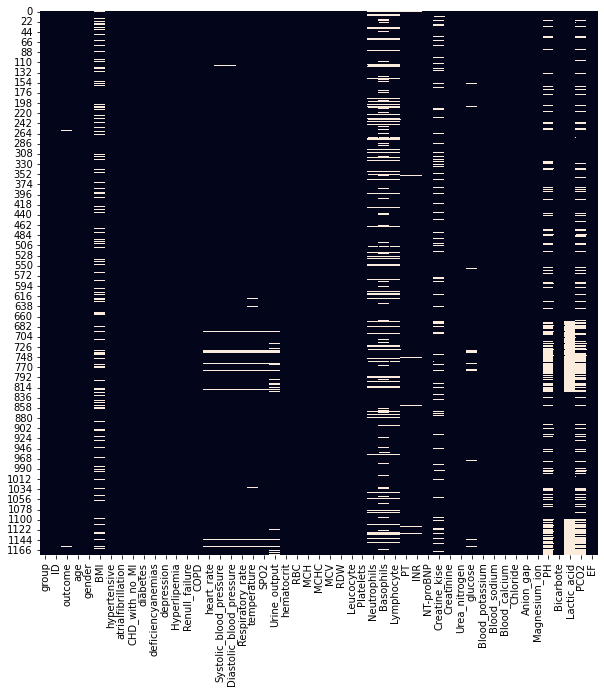

In [82]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_as_csv_1.isnull(), cbar=False)

Urmatorul output al celulei urmatoare ne prezinta rezultatele cu privire la completarea setului nostru de date

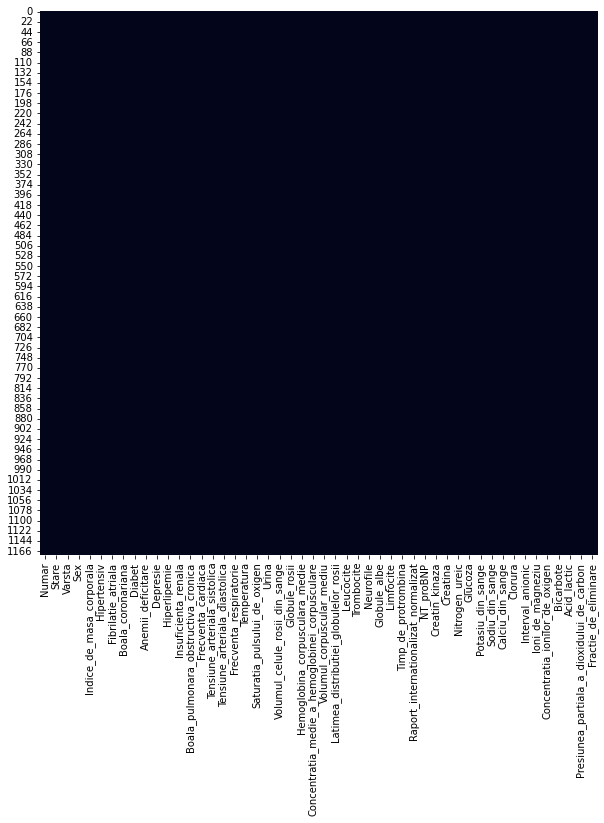

In [83]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_as_csv.isnull(), cbar=False)

### Descriere sumativa a datelor

In [84]:
data_as_csv.describe().style.background_gradient(cmap = 'copper')

,Numar,Stare,Varsta,Sex,Indice_de_masa_corporala,Hipertensiv,Fibrilatie_atriala,Boala_coronariana,Diabet,Anemii_deficitare,Depresie,Hiperlipemie,Insuficienta_renala,Boala_pulmonara_obstructiva_cronica,Frecventa_cardiaca,Tensiune_arteriala_sistolica,Tensiune_arteriala_diastolica,Frecventa_respiratorie,Temperatura,Saturatia_pulsului_de_oxigen,Urina,Volumul_celule_rosii_din_sange,Globule_rosii,Hemoglobina_corpusculara_medie,Concentratia_medie_a_hemoglobinei_corpusculare,Volumul_corpuscular_mediu,Latimea_distributiei_globulelor_rosii,Leucocite,Trombocite,Neurofile,Globule_albe,Limfocite,Timp_de_protrombina,Raport_internationalizat_normalizat,NT_proBNP,Creatin_kinaza,Creatina,Nitrogen_ureic,Glucoza,Potasiu_din_sange,Sodiu_din_sange,Calciu_din_sange,Clorura,Interval_anionic,Ioni_de_magneziu,Concentratia_ionilor_de_oxigen,Bicarbote,Acid_lactic,Presiunea_partiala_a_dioxidului_de_carbon,Fractie_de_eliminare
count,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175
unique,1175,2,68,2,933,2,2,2,2,2,2,2,2,2,1094,1103,1077,1004,775,867,810,1054,1044,925,803,601,836,983,1084,636,74,541,783,426,1145,691,728,924,802,645,600,588,674,486,447,413,657,302,464,14
top,1,alive,89,Male,30.18827765159043,da,nu,nu,nu,nu,nu,nu,nu,nu,84.57584840750846,117.99503522048246,59.53449655225665,20.801511481503425,36.67728595220208,96.27290043504303,1899.2765118317266,35.73333333,3.3575,30.1,32.7,92,15.5,7.4,222,80.11354430419172,0.4055694314716784,12.233024294061039,17.481057149161625,1.1,9834,246.7784560746935,0.9,23,148.79653094522868,4,140,8.9,104,14,2,7.378532073776262,26,1.8534255697974666,45.53538235441683,55
freq,1,1017,140,617,214,844,645,1074,681,776,1035,728,746,1086,12,15,15,12,18,12,35,4,5,7,9,16,9,5,4,144,259,145,20,87,2,165,13,8,17,17,21,17,18,29,37,291,17,228,293,590


#### In urma modificariilor pe care le-am efectua asupra setului de date ales de mine am observat faptul ca anumite coloane sunt mai semnificative decat altele pentru analiza noastra. Aceste coloane sunt  fie etichetate intr-un anumit fel, fie contin valori numerice. Conform scopului urmarit de aceasta analiza, vom considera a fi semnificative urmatoarele coloane pe care le voi grupa mai jos in functie de natura acestora.
 - Coloane categorice
   - Stare
   - Sex
   - Diabet
   - Depresie
 - Coloane numerice
   - Indice_de_masa_corporala
   - Frecventa_cardiaca
   - Frecventa_respiratorie
   - Temperatura
   - Tensiunea_arteriala_sistolica / Tensiunea_arteriala_diastolica
   - Numarul de globule albe si rosii
   - Cantitatea de leucocite,trombocite,neurofile, limfocite
   - Cantitatea de Glucoza, Potasiu, Sodiu, Calciu, Clorura, Magneziu
   - etc.

#### In continuare voi prezenta o serie de grafice unde se poate observa detalii cu privire la variabilelor mentionate mai sus.

## Distributia coloanei Stare

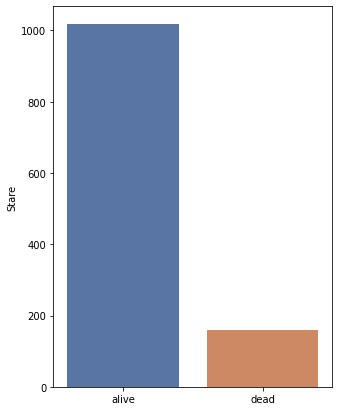

In [85]:
plt.figure(figsize=(5,7))
data=data_as_csv['Stare'].value_counts()[0:2]
sns.barplot(x=data.index,y=data,palette='deep')

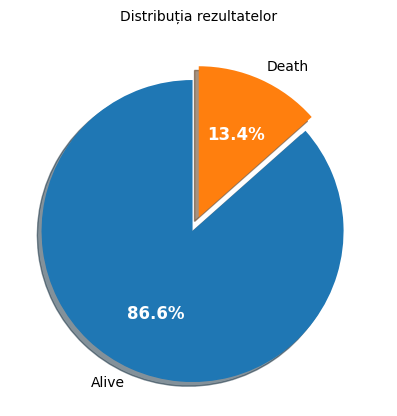

In [86]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
patches, texts, autotexts = ax.pie(data_as_csv_1['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['Alive','Death'])
plt.setp(autotexts, size=12, color = 'white', weight='bold')
autotexts[1].set_color('white');
plt.title('Distribuția rezultatelor', fontsize=10)
plt.show()

In [87]:
fig = px.histogram(data_as_csv, x="Varsta",color="Stare", hover_data=data_as_csv.columns)
fig.show()

## Distributia coloanei Varsta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



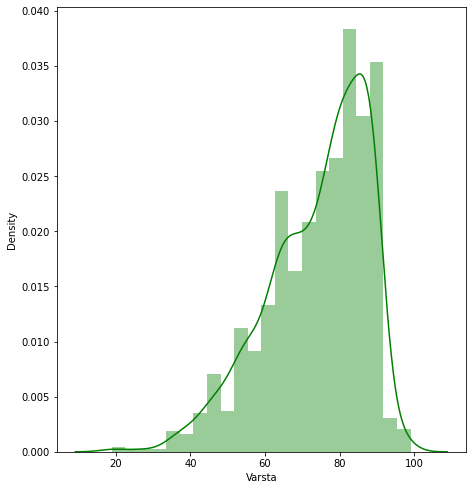

In [88]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Varsta']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='green')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Distributia coloanei Sex

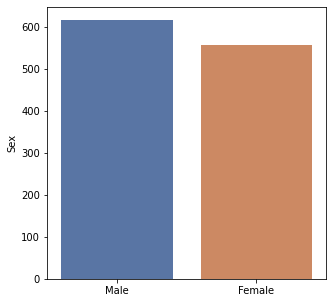

In [89]:
plt.figure(figsize=(5,5))
data=data_as_csv['Sex'].value_counts()[0:2]
sns.barplot(x=data.index,y=data,palette='deep')

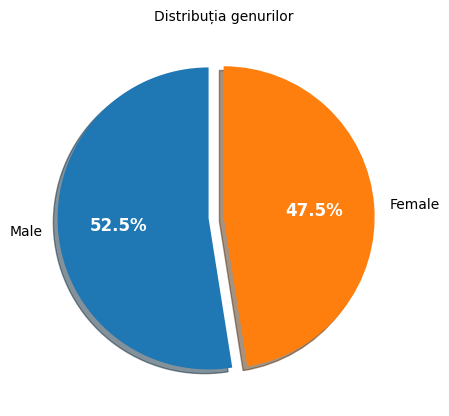

In [90]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
patches, texts, autotexts = ax.pie(data_as_csv_1['gender'].value_counts(), autopct= '%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['Male','Female'])
plt.setp(autotexts, size=12, color = 'white', weight='bold')
autotexts[1].set_color('white');
plt.title('Distribuția genurilor', fontsize=10)
plt.show()

## Distributia coloanei Indice_de_masa_corporala

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



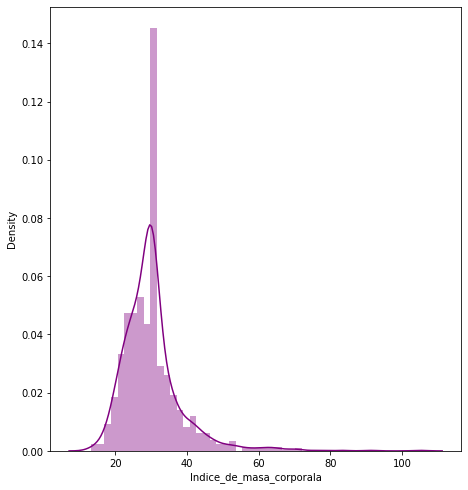

In [91]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Indice_de_masa_corporala']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='purple')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Distributia coloanei Diabet

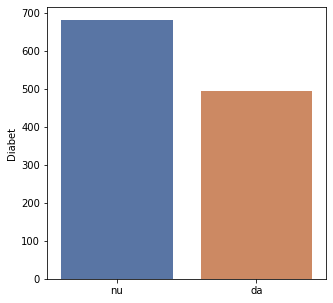

In [92]:
plt.figure(figsize=(5,5))
data=data_as_csv['Diabet'].value_counts()[0:2]
sns.barplot(x=data.index,y=data,palette='deep')

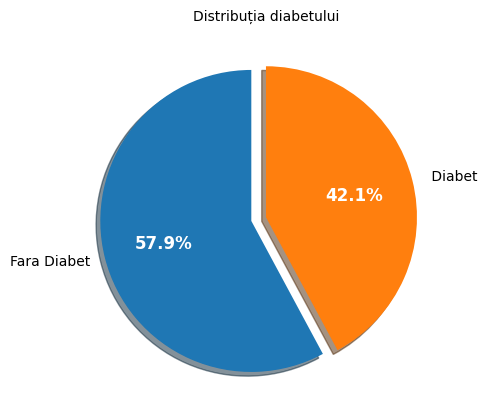

In [93]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
patches, texts, autotexts = ax.pie(data_as_csv_1['diabetes'].value_counts(), autopct= '%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['Fara Diabet',' Diabet'])
plt.setp(autotexts, size=12, color = 'white', weight='bold')
autotexts[1].set_color('white');
plt.title('Distribuția diabetului', fontsize=10)
plt.show()

## Distributia coloanei Depresie

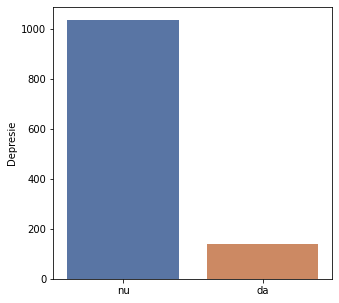

In [94]:
plt.figure(figsize=(5,5))
data=data_as_csv['Depresie'].value_counts()[0:2]
sns.barplot(x=data.index,y=data,palette='deep')

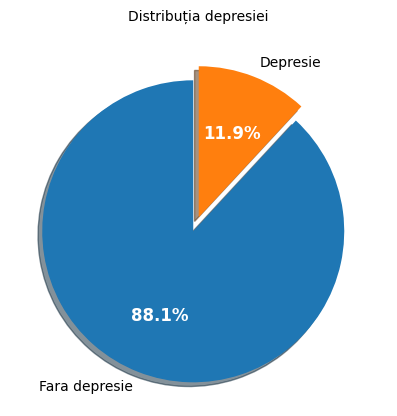

In [95]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
patches, texts, autotexts = ax.pie(data_as_csv_1['depression'].value_counts(), autopct= '%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['Fara depresie','Depresie'])
plt.setp(autotexts, size=12, color = 'white', weight='bold')
autotexts[1].set_color('white');
plt.title('Distribuția depresiei', fontsize=10)
plt.show()

## Distributia coloanei Frecventa_cardiaca

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



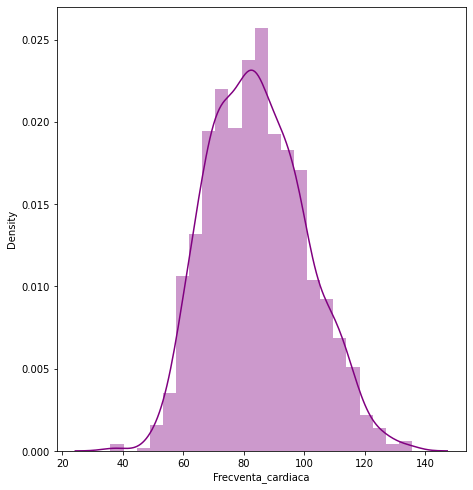

In [96]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Frecventa_cardiaca']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='purple')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Distributia coloanei Frecventa_respiratorie

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



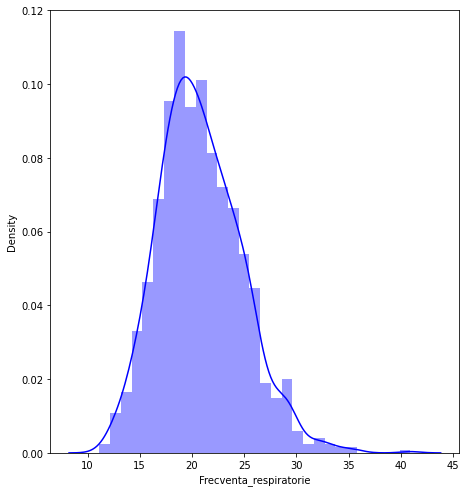

In [97]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Frecventa_respiratorie']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='blue')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Distributia coloanei Temperatura

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



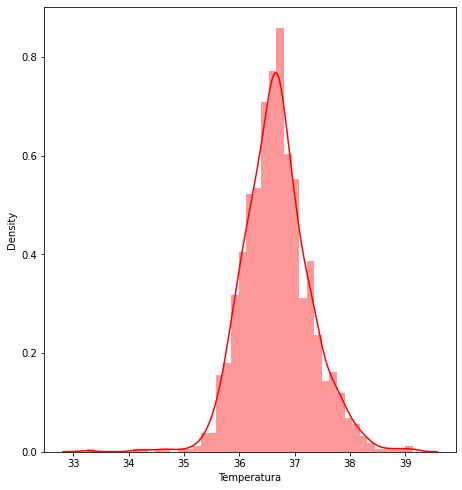

In [98]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Temperatura']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='red')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Distributia coloanelor Tensiune_arteriala_sistolica si Tensiune_arteriala_diastolica

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



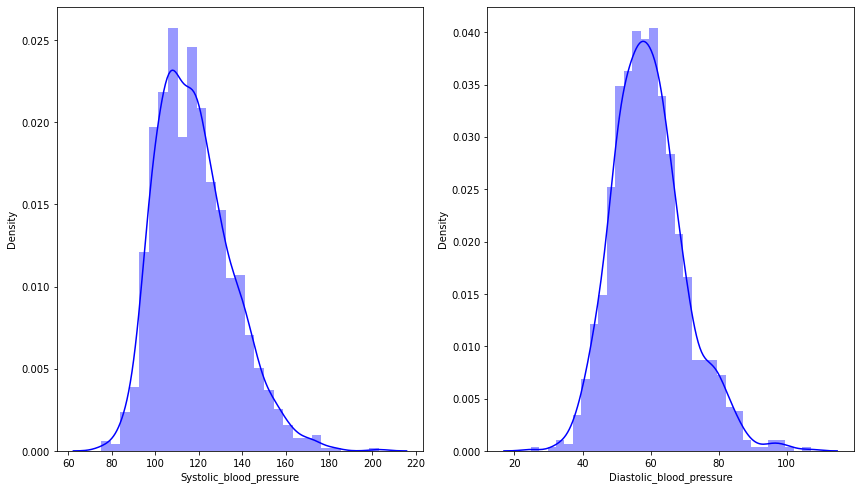

In [99]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Systolic_blood_pressure','Diastolic_blood_pressure']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv_1[column],color='blue')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Distributia coloanelor Globule_albe si Globule_rosii

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



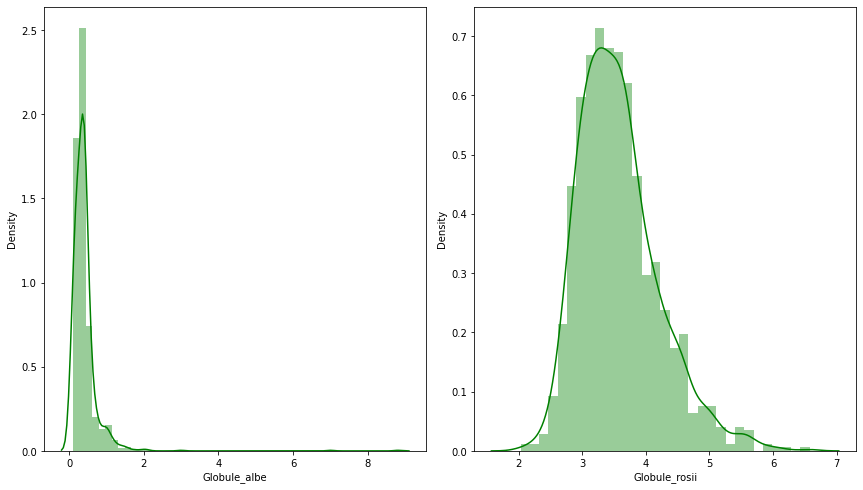

In [100]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Globule_albe','Globule_rosii']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='green')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Distributia coloanelor Leucocite, Trombocite, Neurocite si Limfocite

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



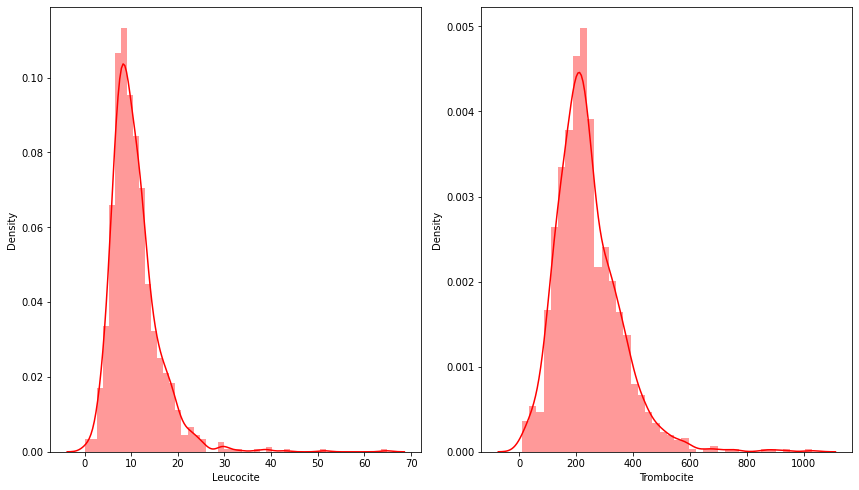

In [101]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Leucocite','Trombocite']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='red',)
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



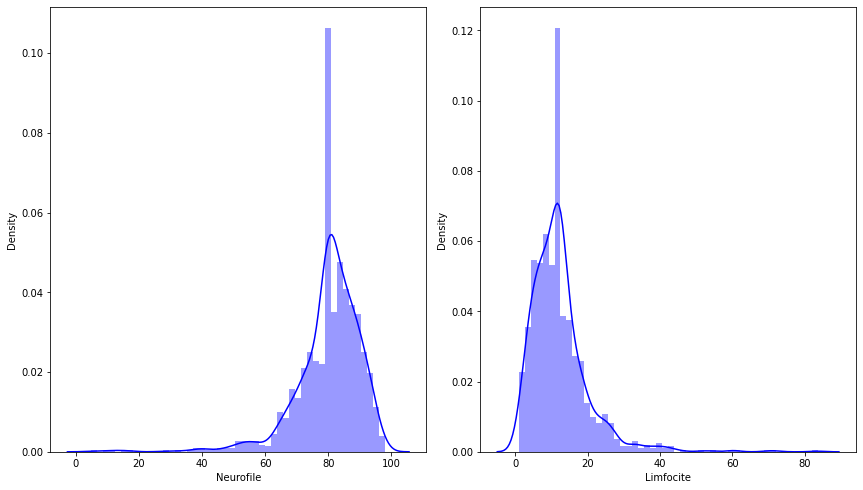

In [102]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Neurofile','Limfocite']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='blue')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Distributia coloanelor Glucoza,Clorura, Potasiu, Sodiu, Calciu si Magneziu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



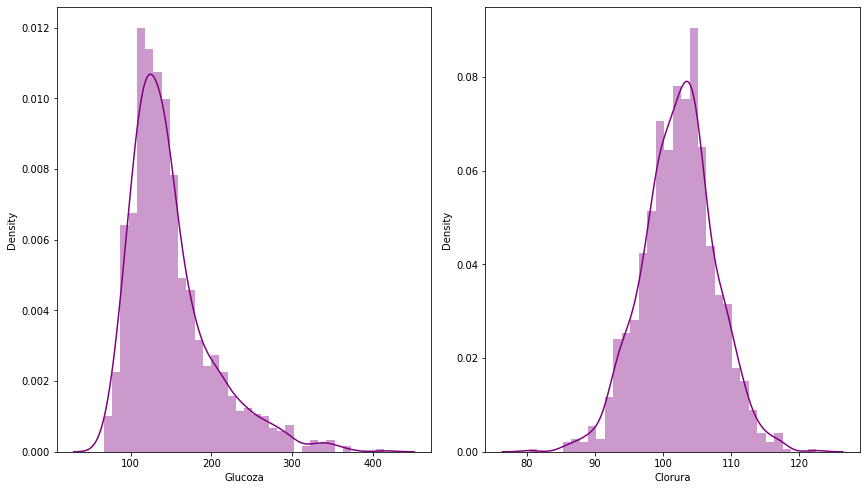

In [103]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Glucoza','Clorura']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='purple')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



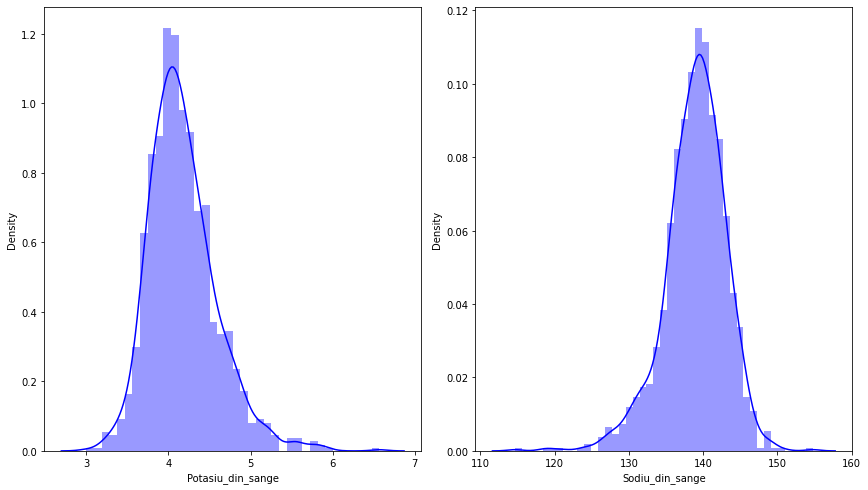

In [104]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Potasiu_din_sange','Sodiu_din_sange']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='blue')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



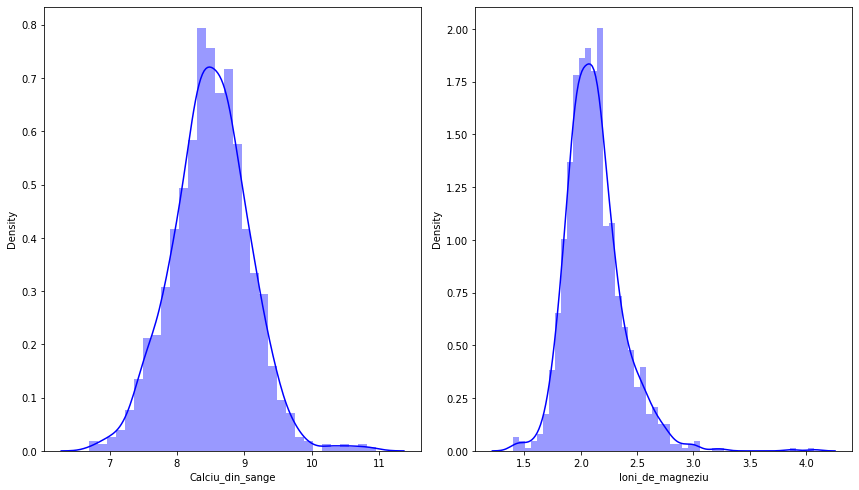

In [105]:
plt.figure(figsize = (30, 20))
plotnumber = 1
cat_cols = ['Calciu_din_sange','Ioni_de_magneziu']
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_as_csv[column],color='blue')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Corelatia dintre variabile principale

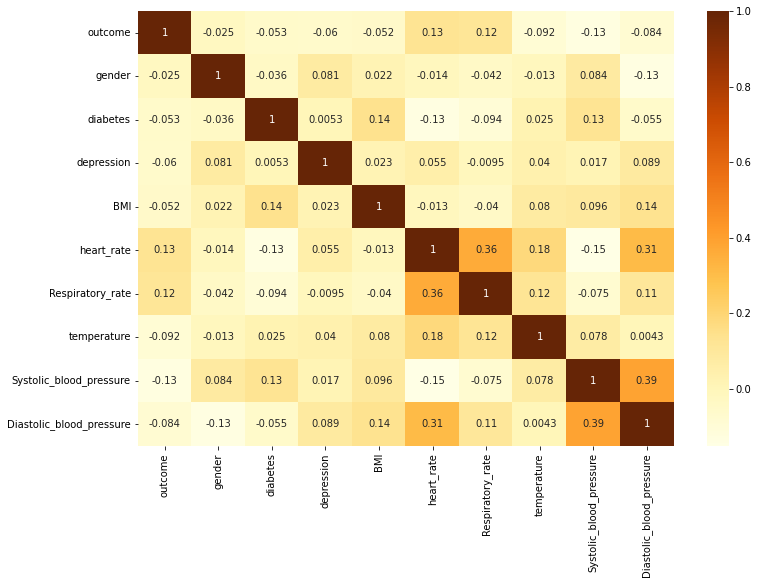

In [106]:
from sklearn.impute import SimpleImputer

dataframe = pd.read_csv('original_data_.csv')
label_x = dataframe.drop(columns='outcome')
label_y = dataframe[['outcome']]

simpleImp = SimpleImputer(missing_values=np.nan, strategy='mean')
column = label_x.select_dtypes(include='float64').columns

simpleImp.fit(label_x[column])
label_x[column] = simpleImp.transform(label_x[column])

SimpleImp =  SimpleImputer(missing_values=np.nan, strategy="most_frequent")
SimpleImp.fit(label_y)

label_y = SimpleImp.transform(label_y)
label_y = pd.DataFrame(label_y, columns=['outcome'], dtype='int64')

df = label_x.copy()
df['outcome'] = label_y
df.groupby(by='group').describe().round().T
col = ['outcome', 'gender', 'diabetes','depression', 'BMI', 'heart_rate', 'Respiratory_rate','temperature','Systolic_blood_pressure','Diastolic_blood_pressure']
corr = df[col].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='YlOrBr');

#### Dintre toate variabilele, putem observa ca exista cateva care sunt puternic corelate. Mai jos, vom putea vizualiza legaturile dintre variabilele din setul de date ales de mine. In urmatoarea celula, as dori sa enumar primele 5 cele mai corelate perechi de variabile pentru a putea vizualiza mult mai bine legatura dintre acestea.

 - Tensiune_arteriala_diastolica - Indice_de_masa_corporala (0.14)
 - Temperatura                   - Frecventa_cardiaca (0.18)
 - Tensiune_arteriala_diastolica - Frecventa_cardiaca (0.31)
 - Frecventa_cardiaca            - Frecventa_respiratorie (0.36)
 - Tensiune_arteriala_sistolica  - Tensiune_arteriala_diastolica (0.39)

## Tensiune_arteriala_sistolica si Tensiune_arteriala_diastolica

In [107]:
px.scatter(data_as_csv, x="Tensiune_arteriala_sistolica", y="Tensiune_arteriala_diastolica",color="Stare",  marginal_y="box", marginal_x="box")

## Frecventa_cardiaca si Frecventa_respiratorie 

In [108]:
px.scatter(data_as_csv, x="Frecventa_cardiaca", y="Frecventa_respiratorie",color="Stare",  marginal_y="box", marginal_x="box")

## Tensiune_arteriala_diastolica si Frecventa_cardiaca

In [109]:
px.scatter(data_as_csv, x="Tensiune_arteriala_diastolica", y="Frecventa_cardiaca",color="Stare",  marginal_y="box", marginal_x="box")

### In urma vizualizari acestor trei ploturi putem observa ca aceste 4 variabile mentionate mai sus sunt foarte corelate.

## Temperatura si Frecventa_cardiaca

In [110]:
px.scatter(data_as_csv, x="Temperatura", y="Frecventa_cardiaca",color="Stare",  marginal_y="box", marginal_x="box")

## Tensiunea_arteriala_diastolica si Indice_de_masa_corporala

In [111]:
px.scatter(data_as_csv, x="Tensiune_arteriala_diastolica", y="Indice_de_masa_corporala",color="Stare",  marginal_y="box", marginal_x="box")

## Vizualizarea variabilelor necorelate si impactul acestora asupra rezultatului final 

### Distributia pacientilor in functie de starea de sanatate si de varsta

In [112]:
fig = px.histogram(data_as_csv, x="Varsta",color="Stare", hover_data=data_as_csv.columns)
fig.show()

### Impactul depresiei asupra starii pacientilor

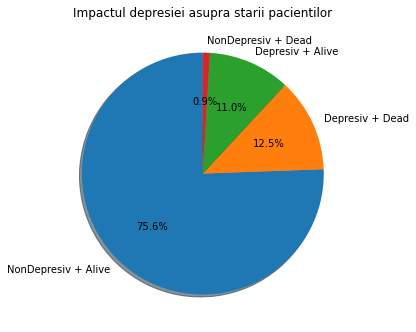

In [113]:
df = dataframe
fig = plt.figure(figsize=(12,7))
#ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.1,0.4, 0.4,0.6])
lab = ['NonDepresiv + Alive', 'Depresiv + Dead', 'Depresiv + Alive', 'NonDepresiv + Dead']
#ax1.bar(df['hypertensive'].unique(),df['hypertensive'].value_counts(sort=False), width=0.5)
#ax1.set_xticks([0,1])

ax2.pie(df.groupby(by=['depression', 'outcome']).outcome.count(), autopct= '%1.1f%%', shadow=True,startangle=90, labels=lab)

plt.title('Impactul depresiei asupra starii pacientilor')
plt.show()

### Impactul diabetului asupra starii pacientilor

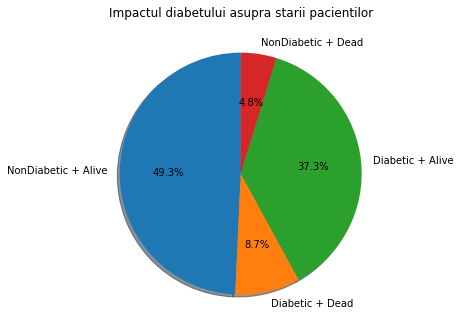

In [114]:
df = dataframe
fig = plt.figure(figsize=(12,7))
#ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.1,0.4, 0.4,0.6])
lab = ['NonDiabetic + Alive', 'Diabetic + Dead', 'Diabetic + Alive', 'NonDiabetic + Dead']
#ax1.bar(df['hypertensive'].unique(),df['hypertensive'].value_counts(sort=False), width=0.5)
#ax1.set_xticks([0,1])

ax2.pie(df.groupby(by=['diabetes', 'outcome']).outcome.count(), autopct= '%1.1f%%', shadow=True,startangle=90, labels=lab)

plt.title('Impactul diabetului asupra starii pacientilor')
plt.show()

### Impactul pierderilor renale asupra starii pacientilor

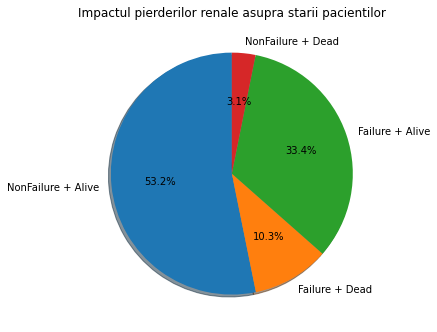

In [115]:
df = dataframe
fig = plt.figure(figsize=(12,7))
#ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.1,0.4, 0.4,0.6])
lab = ['NonFailure + Alive', 'Failure + Dead', 'Failure + Alive', 'NonFailure + Dead']
#ax1.bar(df['hypertensive'].unique(),df['hypertensive'].value_counts(sort=False), width=0.5)
#ax1.set_xticks([0,1])

ax2.pie(df.groupby(by=['Renull_failure','outcome']).outcome.count(), autopct= '%1.1f%%', shadow=True,startangle=90, labels=lab)

plt.title('Impactul pierderilor renale asupra starii pacientilor')
plt.show()

### Impactul hipertensivitatii asupra starii pacientilor

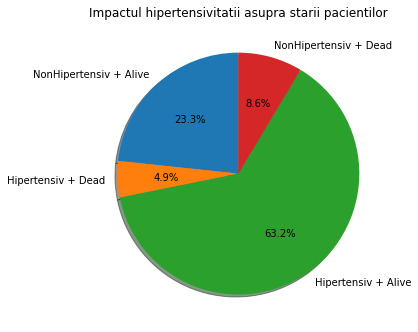

In [116]:
df = dataframe
fig = plt.figure(figsize=(12,7))
#ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.1,0.4, 0.4,0.6])
lab = ['NonHipertensiv + Alive', 'Hipertensiv + Dead', 'Hipertensiv + Alive', 'NonHipertensiv + Dead']
#ax1.bar(df['hypertensive'].unique(),df['hypertensive'].value_counts(sort=False), width=0.5)
#ax1.set_xticks([0,1])

ax2.pie(df.groupby(by=['hypertensive','outcome']).outcome.count(), autopct= '%1.1f%%', shadow=True,startangle=90, labels=lab)

plt.title('Impactul hipertensivitatii asupra starii pacientilor')
plt.show()

#  3. Metode Machine Learning  

 Inainte de a incepe sa construim modele pe care le vom folosi pentru a ne oferi o solutie la problema noastra mai avem o serie de pasi pe care trebuie sa ii parcurgem. Inainte de a incepe sa analizam modelele trebuie sa observam ca setul nostru de date se imparte in 2 seturi de date in functie de natura valorilor si anume categorice si numerice

Pentru a rezolva problema propusa si anume de a prezice valoarea tinta Stare, voi folosi o serie de modele care sa fie potrivite tipurilor mele de date dar si rezultatelor pe care le caut

Setul de date ale de mine poate fi descris in felul urmator din punctul de vedere al tipurilor de date.

---


> ####      ***DATA = CATEGORICAL DATA  +  NUMERIC DATA***

---
In urmatorul tabel voi scrie care au fost modele ales de mine si predictia acestora in functie de rezultatele obtinute dar si de totalitatea datelor folosite 

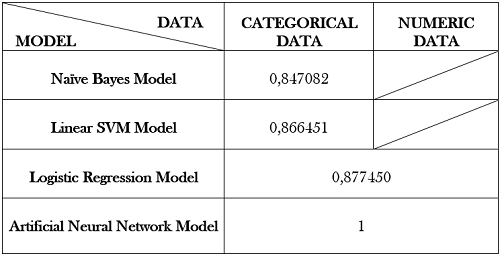

# Modelul Naive Bayes

### Transformarea setului de date pentru a se potrivi modelului

In [117]:
# Salvam datele intr-o alta variabila
naive_bayes_data = data_as_spark.select("Numar","Sex","Hipertensiv","Fibrilatie_atriala","Boala_coronariana","Diabet","Anemii_deficitare","Depresie","Hiperlipemie","Insuficienta_renala","Boala_pulmonara_obstructiva_cronica","Stare")
# In cazul in care dorim sa micsoram numarul de valori introduse
#naive_bayes_data = naive_bayes_data.limit(300)

#1 Modificarea coloanei Stare
naive_bayes_data = naive_bayes_data.withColumn("Stare",when(naive_bayes_data.Stare == "alive","yes").when(naive_bayes_data.Stare == "dead","no").otherwise("null"))
#2 Modificarea coloanei Sex
naive_bayes_data = naive_bayes_data.withColumn("Sex",when(naive_bayes_data.Sex == "Female","female").when(naive_bayes_data.Sex == "Male","male").otherwise("null"))
#3 Modificarea coloanei Hipertensiv
naive_bayes_data = naive_bayes_data.withColumn("Hipertensiv",when(naive_bayes_data.Hipertensiv == "nu","x_hipertensiv").when(naive_bayes_data.Hipertensiv == "da","hipertensiv").otherwise("null"))
#4 Modificarea coloanei Fibrilatie_atriala
naive_bayes_data = naive_bayes_data.withColumn("Fibrilatie_atriala",when(naive_bayes_data.Fibrilatie_atriala == "nu","x_fibrilatie_atriala").when(naive_bayes_data.Fibrilatie_atriala == "da","fibrilatie_atriala").otherwise("null"))
#5 Modificarea coloanei Boala_coronariana
naive_bayes_data = naive_bayes_data.withColumn("Boala_coronariana",when(naive_bayes_data.Boala_coronariana == "nu","x_boala_coronariana").when(naive_bayes_data.Boala_coronariana == "da","boala_coronariana").otherwise("null"))
#6 Modificarea coloanei Diabet
naive_bayes_data = naive_bayes_data.withColumn("Diabet",when(naive_bayes_data.Diabet == "nu","x_diabet").when(naive_bayes_data.Diabet == "da","diabet").otherwise("null"))
#7 Modificarea coloanei Anemii_deficitare
naive_bayes_data = naive_bayes_data.withColumn("Anemii_deficitare",when(naive_bayes_data.Anemii_deficitare == "nu","x_anemii_deficitare").when(naive_bayes_data.Anemii_deficitare == "da","anemii_deficitare").otherwise("null"))
#8 Modificarea coloanei Depresie
naive_bayes_data = naive_bayes_data.withColumn("Depresie",when(naive_bayes_data.Depresie == "nu","x_depresie").when(naive_bayes_data.Depresie == "da","depresie").otherwise("null"))
#9 Modificarea coloanei Hiperlipemie
naive_bayes_data = naive_bayes_data.withColumn("Hiperlipemie",when(naive_bayes_data.Hiperlipemie == "nu","x_hiperlipemie").when(naive_bayes_data.Hiperlipemie == "da","hiperlipemie").otherwise("null"))
#10 Modificarea coloanei Insuficienta_renala
naive_bayes_data = naive_bayes_data.withColumn("Insuficienta_renala",when(naive_bayes_data.Insuficienta_renala == "nu","x_insuficienta_renala").when(naive_bayes_data.Insuficienta_renala == "da","insuficienta_renala").otherwise("null"))
#11 Modificarea coloanei Boala_pulmonara_obstructiva_cronica
naive_bayes_data = naive_bayes_data.withColumn("Boala_pulmonara_obstructiva_cronica",when(naive_bayes_data.Boala_pulmonara_obstructiva_cronica == "nu","x_boala_pulmonara_obstructiva_cronica").when(naive_bayes_data.Boala_pulmonara_obstructiva_cronica == "da","boala_pulmonara_obstructiva_cronica").otherwise("null"))
# Afisarea datelor finale
naive_bayes_data.select("Numar","Stare","Sex","Hipertensiv","Fibrilatie_atriala","Boala_coronariana","Diabet").show()
naive_bayes_data.select("Anemii_deficitare","Depresie","Hiperlipemie","Insuficienta_renala","Boala_pulmonara_obstructiva_cronica","Stare").show()
naive_bayes_data.count()

+-----+-----+------+-------------+--------------------+-------------------+--------+
|Numar|Stare|   Sex|  Hipertensiv|  Fibrilatie_atriala|  Boala_coronariana|  Diabet|
+-----+-----+------+-------------+--------------------+-------------------+--------+
|    1|  yes|female|x_hipertensiv|x_fibrilatie_atriala|x_boala_coronariana|  diabet|
|    2|  yes|  male|x_hipertensiv|x_fibrilatie_atriala|x_boala_coronariana|x_diabet|
|    3|  yes|  male|x_hipertensiv|x_fibrilatie_atriala|x_boala_coronariana|x_diabet|
|    4|  yes|  male|x_hipertensiv|x_fibrilatie_atriala|x_boala_coronariana|x_diabet|
|    5|  yes|  male|  hipertensiv|x_fibrilatie_atriala|x_boala_coronariana|x_diabet|
|    6|  yes|female|  hipertensiv|  fibrilatie_atriala|x_boala_coronariana|x_diabet|
|    7|  yes|female|  hipertensiv|x_fibrilatie_atriala|x_boala_coronariana|x_diabet|
|    8|  yes|  male|  hipertensiv|  fibrilatie_atriala|x_boala_coronariana|  diabet|
|    9|  yes|  male|  hipertensiv|  fibrilatie_atriala|x_boala_co

1175

### Import Library

In [118]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import *

In [119]:
#Salvam datele transformate ca csv
naive_bayes_csv = naive_bayes_data.toPandas()
#Salvam datele local
naive_bayes_csv.to_csv('naive_bayes_data.csv',index=None,header=None)

In [120]:
#Read the data 
pacients_data = pd.read_csv("naive_bayes_data.csv",header = None)
pacients_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,female,x_hipertensiv,x_fibrilatie_atriala,x_boala_coronariana,diabet,anemii_deficitare,x_depresie,hiperlipemie,insuficienta_renala,x_boala_pulmonara_obstructiva_cronica,yes
1,2,male,x_hipertensiv,x_fibrilatie_atriala,x_boala_coronariana,x_diabet,anemii_deficitare,x_depresie,x_hiperlipemie,x_insuficienta_renala,boala_pulmonara_obstructiva_cronica,yes
2,3,male,x_hipertensiv,x_fibrilatie_atriala,x_boala_coronariana,x_diabet,anemii_deficitare,x_depresie,x_hiperlipemie,insuficienta_renala,x_boala_pulmonara_obstructiva_cronica,yes
3,4,male,x_hipertensiv,x_fibrilatie_atriala,x_boala_coronariana,x_diabet,x_anemii_deficitare,x_depresie,x_hiperlipemie,x_insuficienta_renala,x_boala_pulmonara_obstructiva_cronica,yes
4,5,male,hipertensiv,x_fibrilatie_atriala,x_boala_coronariana,x_diabet,anemii_deficitare,x_depresie,x_hiperlipemie,insuficienta_renala,boala_pulmonara_obstructiva_cronica,yes


### Create Pyspark Dataframe

In [121]:
#Create Dataframe
pacients_df = spark.createDataFrame(pacients_data)
pacients_df.columns

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

### Change the columns

In [122]:
pacients_df = pacients_df.select(col("0").alias("numar"),
                                 col("1").alias("sex"),
                                 col("2").alias("tensiune"),
                                 col("3").alias("fibrilatie_atriala"),
                                 col("4").alias("boala_coronariana"),
                                 col("5").alias("diabet"),
                                 col("6").alias("anemii_deficitare"),
                                 col("7").alias("depresie"),
                                 col("8").alias("hiperlipemie"),
                                 col("9").alias("insuficienta_renala"),
                                 col("10").alias("boala_pulmonara_obstructiva_cronica"),
                                 col("11").alias("stare"))

### Add the index columns

In [123]:
indexers = [StringIndexer(inputCol="numar", outputCol = "numar_index"), 
            StringIndexer(inputCol="sex", outputCol = "sex_index"),
            StringIndexer(inputCol="tensiune", outputCol = "tensiune_index"), 
            StringIndexer(inputCol="fibrilatie_atriala", outputCol = "fibrilatie_atriala_index"),
            StringIndexer(inputCol="boala_coronariana", outputCol = "boala_coronariana_index"),
            StringIndexer(inputCol="diabet", outputCol = "diabet_index"), 
            StringIndexer(inputCol="anemii_deficitare", outputCol = "anemii_deficitare_index"), 
            StringIndexer(inputCol="depresie", outputCol = "depresie_index"), 
            StringIndexer(inputCol="hiperlipemie", outputCol ="hiperlipemie_index"), 
            StringIndexer(inputCol="insuficienta_renala", outputCol = "insuficienta_renala_index"), 
            StringIndexer(inputCol="boala_pulmonara_obstructiva_cronica", outputCol ="boala_pulmonara_obstructiva_cronica_index"),
            StringIndexer(inputCol="stare", outputCol = "label")]

### Create the pipeline

In [124]:
pipeline = Pipeline(stages = indexers)
indexed_pacients_df = pipeline.fit(pacients_df).transform(pacients_df)

### Visualize the results

In [125]:
indexed_pacients_df.show(5,False)

+-----+------+-------------+--------------------+-------------------+--------+-------------------+----------+--------------+---------------------+-------------------------------------+-----+-----------+---------+--------------+------------------------+-----------------------+------------+-----------------------+--------------+------------------+-------------------------+-----------------------------------------+-----+
|numar|sex   |tensiune     |fibrilatie_atriala  |boala_coronariana  |diabet  |anemii_deficitare  |depresie  |hiperlipemie  |insuficienta_renala  |boala_pulmonara_obstructiva_cronica  |stare|numar_index|sex_index|tensiune_index|fibrilatie_atriala_index|boala_coronariana_index|diabet_index|anemii_deficitare_index|depresie_index|hiperlipemie_index|insuficienta_renala_index|boala_pulmonara_obstructiva_cronica_index|label|
+-----+------+-------------+--------------------+-------------------+--------+-------------------+----------+--------------+---------------------+----------

### Create the features vectors

In [126]:
vectorAssembler = VectorAssembler(inputCols = ["numar_index","sex_index","tensiune_index","fibrilatie_atriala_index","boala_coronariana_index","diabet_index","anemii_deficitare_index","depresie_index","hiperlipemie_index","insuficienta_renala_index","boala_pulmonara_obstructiva_cronica_index"],outputCol = "features")
vindexed_pacients_df = vectorAssembler.transform(indexed_pacients_df)

### Visualize the results

In [127]:
vindexed_pacients_df.show(5,False)

+-----+------+-------------+--------------------+-------------------+--------+-------------------+----------+--------------+---------------------+-------------------------------------+-----+-----------+---------+--------------+------------------------+-----------------------+------------+-----------------------+--------------+------------------+-------------------------+-----------------------------------------+-----+--------------------------------------------+
|numar|sex   |tensiune     |fibrilatie_atriala  |boala_coronariana  |diabet  |anemii_deficitare  |depresie  |hiperlipemie  |insuficienta_renala  |boala_pulmonara_obstructiva_cronica  |stare|numar_index|sex_index|tensiune_index|fibrilatie_atriala_index|boala_coronariana_index|diabet_index|anemii_deficitare_index|depresie_index|hiperlipemie_index|insuficienta_renala_index|boala_pulmonara_obstructiva_cronica_index|label|features                                    |
+-----+------+-------------+--------------------+-----------------

 ### Import the model

In [128]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

### Divizarea train-test

In [129]:
splits = vindexed_pacients_df.randomSplit([0.6,0.4])
train_df = splits[0]
test_df = splits[1]

### Crearea modelului si configurarea parametrilor sai


In [130]:
nb = NaiveBayes(smoothing=1.0,modelType="multinomial")

### Antrenarea modelului

In [131]:
nbmodel = nb.fit(train_df)

### Aplicarea modelului si afisarea primelor 5 linii

In [132]:
# select example rows to display
predictions_df = nbmodel.transform(test_df)
predictions_df.show(5)

+-----+------+-------------+--------------------+-------------------+--------+-------------------+----------+--------------+--------------------+-----------------------------------+-----+-----------+---------+--------------+------------------------+-----------------------+------------+-----------------------+--------------+------------------+-------------------------+-----------------------------------------+-----+--------------------+--------------------+--------------------+----------+
|numar|   sex|     tensiune|  fibrilatie_atriala|  boala_coronariana|  diabet|  anemii_deficitare|  depresie|  hiperlipemie| insuficienta_renala|boala_pulmonara_obstructiva_cronica|stare|numar_index|sex_index|tensiune_index|fibrilatie_atriala_index|boala_coronariana_index|diabet_index|anemii_deficitare_index|depresie_index|hiperlipemie_index|insuficienta_renala_index|boala_pulmonara_obstructiva_cronica_index|label|            features|       rawPrediction|         probability|prediction|
+-----+------+

### Calculul acuratetei pe dataset-ul de test

In [135]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
nbaccuracy = evaluator.evaluate(predictions_df)
print("Test set accuracy = " + str(nbaccuracy))

Test set accuracy = 0.8888888888888888


# Modelul Linear SVM

### Import model

In [142]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix

### Visualize the features

In [143]:
va_df = vindexed_pacients_df.select(['features', 'label'])
va_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(11,[1,2,5,6,8,9]...|  0.0|
|(11,[0,2,6,10],[2...|  0.0|
|(11,[0,2,6,9],[39...|  0.0|
+--------------------+-----+
only showing top 3 rows



### Divizarea train-test

In [144]:
(train, test) = va_df.randomSplit([0.9, 0.1])

### Crearea modelului si configurarea parametrilor sai

In [145]:
lsvc = LinearSVC(labelCol="label", maxIter=50,regParam=0.1)

### Antrenarea modelului

In [146]:
lsvcModel = lsvc.fit(train)

### Afisarea coeficientilor

In [147]:
print("Coefficients: " + str(lsvcModel.coefficients))
print("Intercept: " + str(lsvcModel.intercept))

Coefficients: [-3.2161912691296665e-09,-5.886041889810479e-05,1.3432638807815618e-05,4.758202144397335e-05,1.5383848718496854e-05,-0.0004296554464475632,-2.424787200714913e-05,0.0,-1.994947567246183e-06,-3.7954762669978905e-05,-0.09306299728842779]
Intercept: -1.0000358323594556


### Predictions

In [148]:
pred = lsvcModel.transform(test)
pred.show(3)

+--------------------+-----+--------------------+----------+
|            features|label|       rawPrediction|prediction|
+--------------------+-----+--------------------+----------+
|    (11,[0],[267.0])|  0.0|[1.00003669108252...|       0.0|
|(11,[0,1],[240.0,...|  0.0|[1.00009546466425...|       0.0|
|(11,[0,1,2],[248....|  0.0|[1.00008205775498...|       0.0|
+--------------------+-----+--------------------+----------+
only showing top 3 rows



### Acuratetea

In [151]:
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
acc = evaluator.evaluate(pred)
print(" Accuracy: ", acc)

 Accuracy:  0.8490566037735849


### Matrix of confusion

In [152]:
y_pred=pred.select("prediction").collect()
y_orig=pred.select("label").collect()
cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm) 

Confusion Matrix:
[[90  0]
 [16  0]]


# Modelul regresie logistica

### Transformarea datelor pentru a se potrivi cu modelul

In [156]:
# Salvam datele intr-o alta variabila
log_regr_data = data_as_spark.select(data_as_spark.Varsta.cast("integer"),"Sex","Depresie",data_as_spark.Frecventa_cardiaca.cast("float"),data_as_spark.Tensiune_arteriala_sistolica.cast("float"),"Diabet",data_as_spark.Temperatura.cast("float"),"Hipertensiv",data_as_spark.Potasiu_din_sange.cast("float"),data_as_spark.Calciu_din_sange.cast("float"),data_as_spark.Frecventa_respiratorie.cast("float"),"Stare")
cols = log_regr_data.columns
#1 Modificarea coloanei Stare
log_regr_data = log_regr_data.withColumn("Stare",when(log_regr_data.Stare == "alive","yes").when(log_regr_data.Stare == "dead","no").otherwise("null"))
#2 Modificarea coloanei Sex
log_regr_data = log_regr_data.withColumn("Sex",when(log_regr_data.Sex == "Female","female").when(log_regr_data.Sex == "Male","male").otherwise("null"))
#3 Modificarea coloanei Depresie
log_regr_data = log_regr_data.withColumn("Depresie",when(log_regr_data.Depresie == "nu","no").when(log_regr_data.Depresie == "da","yes").otherwise("null"))
#4 Modificarea coloanei Diabet
log_regr_data = log_regr_data.withColumn("Diabet",when(log_regr_data.Diabet == "nu","no").when(log_regr_data.Diabet == "da","yes").otherwise("null"))
#5 Modificarea coloanei Hipertensiv
log_regr_data = log_regr_data.withColumn("Hipertensiv",when(log_regr_data.Hipertensiv == "nu","no").when(log_regr_data.Hipertensiv == "da","yes").otherwise("null"))

# Afisarea datelor finale
log_regr_data.select("Varsta","Sex","Depresie","Frecventa_cardiaca","Tensiune_arteriala_sistolica","Diabet").show()
log_regr_data.select("Temperatura","Hipertensiv","Potasiu_din_sange","Calciu_din_sange","Frecventa_respiratorie","Stare").show()
log_regr_data.count()
log_regr_data.printSchema()

+------+------+--------+------------------+----------------------------+------+
|Varsta|   Sex|Depresie|Frecventa_cardiaca|Tensiune_arteriala_sistolica|Diabet|
+------+------+--------+------------------+----------------------------+------+
|    72|female|      no|          68.83784|                   155.86667|   yes|
|    75|  male|      no|         101.37037|                       140.0|    no|
|    83|  male|      no|         72.318184|                   135.33333|    no|
|    43|  male|      no|              94.5|                       126.4|    no|
|    75|  male|      no|             67.92|                      156.56|    no|
|    76|female|      no|         74.181816|                       118.1|    no|
|    72|female|      no|          69.63636|                  106.565216|    no|
|    83|  male|      no|         84.666664|                   141.13043|   yes|
|    61|  male|      no|         91.916664|                   98.434784|   yes|
|    67|female|      no|         75.0833

### Import library

In [157]:
from pyspark.ml.feature import OneHotEncoder,StringIndexer,VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator

### Categorical columns

In [158]:
categoricalColumns = ['Sex','Depresie','Diabet','Hipertensiv']
stages = []

### Indexing categorical columns

In [159]:
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer,encoder]

### Indexing target column

In [160]:
label_stringIdx = StringIndexer(inputCol = 'Stare', outputCol = 'label')
stages += [label_stringIdx]

### Indexing numeric columns

In [161]:
numericCols = ['Varsta','Frecventa_cardiaca','Tensiune_arteriala_sistolica','Temperatura','Potasiu_din_sange','Calciu_din_sange','Frecventa_respiratorie']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

### Create pipeline

In [162]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(log_regr_data)
log_regr_data = pipelineModel.transform(log_regr_data)
selectedCols = ['label', 'features'] + cols
log_regr_data = log_regr_data.select(selectedCols)

### Divizarea  train-test

In [163]:
train, test = log_regr_data.randomSplit([0.7, 0.3])
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 809
Test Dataset Count: 366


### Import the model

In [164]:
from pyspark.ml.classification import LogisticRegression

### Crearea modelului si configurarea parametrilor sai

In [165]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)


### Antrenarea modelului

In [166]:
lrModel = lr.fit(train)

### Beta Coefficients

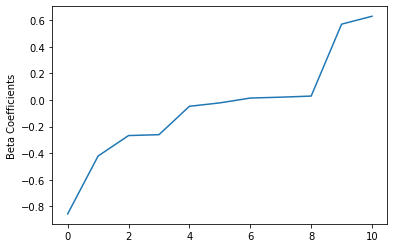

In [167]:
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

### Plot the ROC Curve

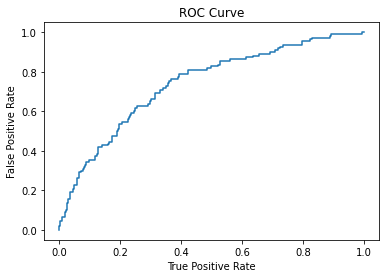

Training set areaUnderROC: 0.7387566653661104


In [168]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

### Visualize the precision

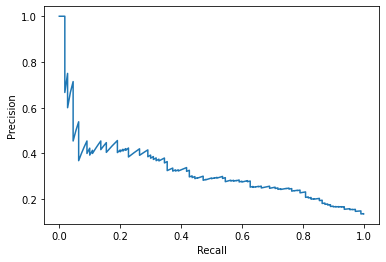

In [169]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### Visualize the predictions

In [170]:
predictions = lrModel.transform(test)
predictions.select('Varsta', 'Sex', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+------+------+-----+--------------------+----------+--------------------+
|Varsta|   Sex|label|       rawPrediction|prediction|         probability|
+------+------+-----+--------------------+----------+--------------------+
|    78|female|  0.0|[2.47739620586088...|       0.0|[0.92254193972512...|
|    32|female|  0.0|[3.19295328407156...|       0.0|[0.96056823397809...|
|    47|female|  0.0|[3.27645215005637...|       0.0|[0.96361208682000...|
|    48|female|  0.0|[2.84264532086691...|       0.0|[0.94493726257457...|
|    85|female|  0.0|[1.70352965676057...|       0.0|[0.84599516634526...|
|    87|female|  0.0|[2.54731474976166...|       0.0|[0.92739290988736...|
|    39|female|  0.0|[3.91176989160257...|       0.0|[0.98038729056891...|
|    71|female|  0.0|[3.02228596113570...|       0.0|[0.95357083797530...|
|    81|female|  0.0|[0.77092600254329...|       0.0|[0.68372117263213...|
|    57|female|  0.0|[2.55310886080411...|       0.0|[0.92778209324832...|
+------+------+-----+----

### Area under curve on the test dataset

In [171]:
predictionAndLabels = lrModel.evaluate(train)
evaluator = BinaryClassificationEvaluator()
predictionAndLabels.predictions.show()

+-----+--------------------+------+------+--------+------------------+----------------------------+------+-----------+-----------+-----------------+----------------+----------------------+-----+--------------------+--------------------+----------+
|label|            features|Varsta|   Sex|Depresie|Frecventa_cardiaca|Tensiune_arteriala_sistolica|Diabet|Temperatura|Hipertensiv|Potasiu_din_sange|Calciu_din_sange|Frecventa_respiratorie|Stare|       rawPrediction|         probability|prediction|
+-----+--------------------+------+------+--------+------------------+----------------------------+------+-----------+-----------+-----------------+----------------+----------------------+-----+--------------------+--------------------+----------+
|  0.0|[0.0,0.0,0.0,0.0,...|    60|female|     yes|              81.5|                  102.702705|   yes|      36.36|         no|        3.8363636|       7.9142857|             18.060606|  yes|[1.82239750835842...|[0.86085356041197...|       0.0|
|  0.0|[

In [172]:
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7440382599580736


### Accuracy

In [174]:
# Pentru multiclass
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label',metricName='accuracy')
acc = evaluator.evaluate(predictionAndLabels.predictions)
print(" Accuracy: ", acc)

 Accuracy:  0.8640296662546354


# 5. Metode Deep Learning

## Modelul Artificial Neural Network 

### Install TensorFlow

In [175]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Tensorflow

In [176]:
import tensorflow as tf

### Reading the data

In [185]:
tensor_data = pd.read_csv('processed_data.csv')
tensor_data.head()

,Numar,Stare,Varsta,Sex,Indice_de_masa_corporala,Hipertensiv,Fibrilatie_atriala,Boala_coronariana,Diabet,Anemii_deficitare,...,Sodiu_din_sange,Calciu_din_sange,Clorura,Interval_anionic,Ioni_de_magneziu,Concentratia_ionilor_de_oxigen,Bicarbote,Acid_lactic,Presiunea_partiala_a_dioxidului_de_carbon,Fractie_de_eliminare
0,1,alive,72,Female,37.588179,nu,nu,nu,da,da,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,2,alive,75,Male,30.188278,nu,nu,nu,nu,da,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,3,alive,83,Male,26.572634,nu,nu,nu,nu,da,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,4,alive,43,Male,83.264629,nu,nu,nu,nu,nu,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,5,alive,75,Male,31.824842,da,nu,nu,nu,da,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


### Transformarea datelor pentru a se potrivi modelului

In [186]:
#Modifications of the dataset

#Modifications of the Stare
tensor_data.loc[tensor_data["Stare"] == "alive", "Stare"] = 1
tensor_data.loc[tensor_data["Stare"] == "dead", "Stare"] = 0

#Modifications of the Hipertensiv
tensor_data.loc[tensor_data["Hipertensiv"] == "nu", "Hipertensiv"] = 0
tensor_data.loc[tensor_data["Hipertensiv"] == "da", "Hipertensiv"] = 1

#Modifications of the Fibrilatie_atriala
tensor_data.loc[tensor_data["Fibrilatie_atriala"] == "nu", "Fibrilatie_atriala"] = 0
tensor_data.loc[tensor_data["Fibrilatie_atriala"] == "da", "Fibrilatie_atriala"] = 1

#Modifications of the Boala_coronariana
tensor_data.loc[tensor_data["Boala_coronariana"] == "nu", "Boala_coronariana"] = 0
tensor_data.loc[tensor_data["Boala_coronariana"] == "da", "Boala_coronariana"] = 1

#Modifications of the Diabet
tensor_data.loc[tensor_data["Diabet"] == "nu", "Diabet"] = 0
tensor_data.loc[tensor_data["Diabet"] == "da", "Diabet"] = 1

#Modifications of the Anemii_deficitare
tensor_data.loc[tensor_data["Anemii_deficitare"] == "nu", "Anemii_deficitare"] = 0
tensor_data.loc[tensor_data["Anemii_deficitare"] == "da", "Anemii_deficitare"] = 1

#Modifications of the Depresie
tensor_data.loc[tensor_data["Depresie"] == "nu", "Depresie"] = 0
tensor_data.loc[tensor_data["Depresie"] == "da", "Depresie"] = 1

#Modifications of the Hiperlipemie
tensor_data.loc[tensor_data["Hiperlipemie"] == "nu", "Hiperlipemie"] = 0
tensor_data.loc[tensor_data["Hiperlipemie"] == "da", "Hiperlipemie"] = 1

#Modifications of the Insuficienta_renala
tensor_data.loc[tensor_data["Insuficienta_renala"] == "nu", "Insuficienta_renala"] = 0
tensor_data.loc[tensor_data["Insuficienta_renala"] == "da", "Insuficienta_renala"] = 1

#Modifications of the Boala_pulmonara_obstructiva_cronica
tensor_data.loc[tensor_data["Boala_pulmonara_obstructiva_cronica"] == "nu", "Boala_pulmonara_obstructiva_cronica"] = 0
tensor_data.loc[tensor_data["Boala_pulmonara_obstructiva_cronica"] == "da", "Boala_pulmonara_obstructiva_cronica"] = 1

X = tensor_data.drop(['Numar','Fibrilatie_atriala','Boala_coronariana','Anemii_deficitare','Hiperlipemie','Insuficienta_renala','Boala_pulmonara_obstructiva_cronica','Urina','Saturatia_pulsului_de_oxigen','Volumul_celule_rosii_din_sange','Hemoglobina_corpusculara_medie','Concentratia_medie_a_hemoglobinei_corpusculare','Volumul_corpuscular_mediu','Latimea_distributiei_globulelor_rosii','Timp_de_protrombina','Raport_internationalizat_normalizat','NT_proBNP','Creatin_kinaza','Creatina','Nitrogen_ureic','Interval_anionic','Ioni_de_magneziu','Concentratia_ionilor_de_oxigen','Bicarbote','Acid_lactic','Presiunea_partiala_a_dioxidului_de_carbon','Fractie_de_eliminare'],axis = 1)
y = tensor_data['Stare']
#y.shape

### Processing the values of 'Sex' column

In [187]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoder_gen = encoder.fit_transform(X[["Sex"]]).toarray()
X[['is_female']] = encoder_gen
X.drop(['Sex'],axis=1,inplace=True)

### Data Scaling

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

standardized_attrs = scaler.fit_transform(X[['Varsta','Indice_de_masa_corporala','Hipertensiv','Diabet','Depresie','Frecventa_cardiaca','Tensiune_arteriala_sistolica','Tensiune_arteriala_diastolica','Frecventa_respiratorie','Temperatura','Globule_rosii','Leucocite','Trombocite', 'Neurofile', 'Globule_albe', 'Limfocite', 'Glucoza', 'Potasiu_din_sange', 'Sodiu_din_sange', 'Calciu_din_sange', 'Clorura']])
X[['Varsta','Indice_de_masa_corporala','Hipertensiv','Diabet','Depresie','Frecventa_cardiaca','Tensiune_arteriala_sistolica','Tensiune_arteriala_diastolica','Frecventa_respiratorie','Temperatura','Globule_rosii','Leucocite','Trombocite', 'Neurofile', 'Globule_albe', 'Limfocite', 'Glucoza', 'Potasiu_din_sange', 'Sodiu_din_sange', 'Calciu_din_sange', 'Clorura']] = standardized_attrs
X.describe()


,Varsta,Indice_de_masa_corporala,Hipertensiv,Diabet,Depresie,Frecventa_cardiaca,Tensiune_arteriala_sistolica,Tensiune_arteriala_diastolica,Frecventa_respiratorie,Temperatura,...,Trombocite,Neurofile,Globule_albe,Limfocite,Glucoza,Potasiu_din_sange,Sodiu_din_sange,Calciu_din_sange,Clorura,is_female
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,...,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,0.687936,0.183849,0.718298,0.420426,0.119149,0.487210,0.336019,0.423163,0.324728,0.582654,...,0.227770,0.807694,0.035153,0.136500,0.236158,0.329812,0.604685,0.423982,0.521125,0.525106
std,0.167948,0.092082,0.450020,0.493837,0.324102,0.159898,0.134810,0.128992,0.133863,0.102528,...,0.111123,0.112237,0.047232,0.098021,0.146985,0.116385,0.103516,0.134509,0.126266,0.499582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.575000,0.130155,0.000000,0.000000,0.000000,0.366364,0.238325,0.335015,0.228833,0.516285,...,0.156468,0.768011,0.011494,0.074313,0.136237,0.252336,0.549037,0.341176,0.443291,0.000000
50%,0.725000,0.183812,1.000000,0.000000,0.000000,0.479224,0.323438,0.412165,0.313037,0.579962,...,0.209198,0.812366,0.034483,0.129140,0.203484,0.312417,0.613507,0.423529,0.526113,1.000000
75%,0.825000,0.204755,1.000000,1.000000,0.000000,0.597936,0.417913,0.494433,0.410932,0.640410,...,0.289345,0.877419,0.035123,0.166397,0.294438,0.392523,0.672154,0.510441,0.598605,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Divizarea train-test

In [189]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Import tensorflow libraries for ANN

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Crearea modelului si stabilirea parametrilor potriviti

In [191]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(23,))) # First layer 
model.add(Dense(units=100, activation='relu')) # Second layer
model.add(Dense(units=1, activation='sigmoid')) # Output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12,601
Trainable params: 12,601
Non-trainable params: 0
_________________________________________________________________


### Compilarea modelului

In [192]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Data conversion to tensor type

In [193]:
X_train =tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

### Antrenarea modelului

In [194]:
history = model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test),verbose=1,batch_size=128)

Epoch 1/100
6/6 [==============================] - 1s 39ms/step - loss: 0.4503 - accuracy: 0.8596 - val_loss: 0.3586 - val_accuracy: 0.8745
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.3502 - accuracy: 0.8596 - val_loss: 0.3044 - val_accuracy: 0.8745
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3140 - accuracy: 0.8596 - val_loss: 0.2704 - val_accuracy: 0.8745
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2722 - accuracy: 0.8596 - val_loss: 0.2273 - val_accuracy: 0.8745
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.2246 - accuracy: 0.8624 - val_loss: 0.1886 - val_accuracy: 0.9064
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1791 - accuracy: 0.9149 - val_loss: 0.1433 - val_accuracy: 0.9489
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1339 - accuracy: 0.9617 - val_loss: 0.1047 - val_accuracy: 0.9851
Epoch 8/100
6/6 [=======

### Calcularea predictiilor

In [195]:
y_pred = model.predict(X_test).reshape((-1,)) > 0.5
y_pred = y_pred.astype(np.int32)
y_pred[0:5]

array([1, 1, 1, 1, 1], dtype=int32)

### Matrix of confusion 

In [196]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 59,   0],
       [  0, 411]])

### Accuracy

In [197]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 2.8169e-05 - accuracy: 1.0000


[2.816872438415885e-05, 1.0]

### Loss plot

Text(0, 0.5, 'loss')

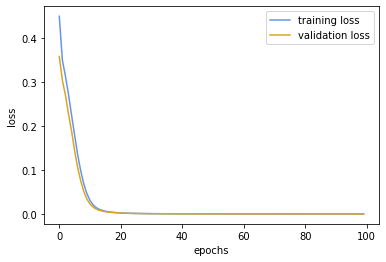

In [198]:
plt.plot(history.history['loss'],c='cornflowerblue',label='training loss')
plt.plot(history.history['val_loss'],c='goldenrod',label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')